# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,VarianceThreshold,RFE,chi2,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp

# Read Dataset

In [2]:
credit_df=pd.read_csv(r"train.csv")
credit_df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

# EDA

### Data Info

In [80]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [81]:
duplicate=credit_df.duplicated().sum()
duplicate[duplicate>0]

array([], dtype=int64)

### Statistical Info

In [82]:
credit_df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

##### The model may be influenced by fluctuations as standard deviation of the numerical columns are overall high.

In [83]:
credit_df.describe(include="object")

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

### Analysis

### Univariate

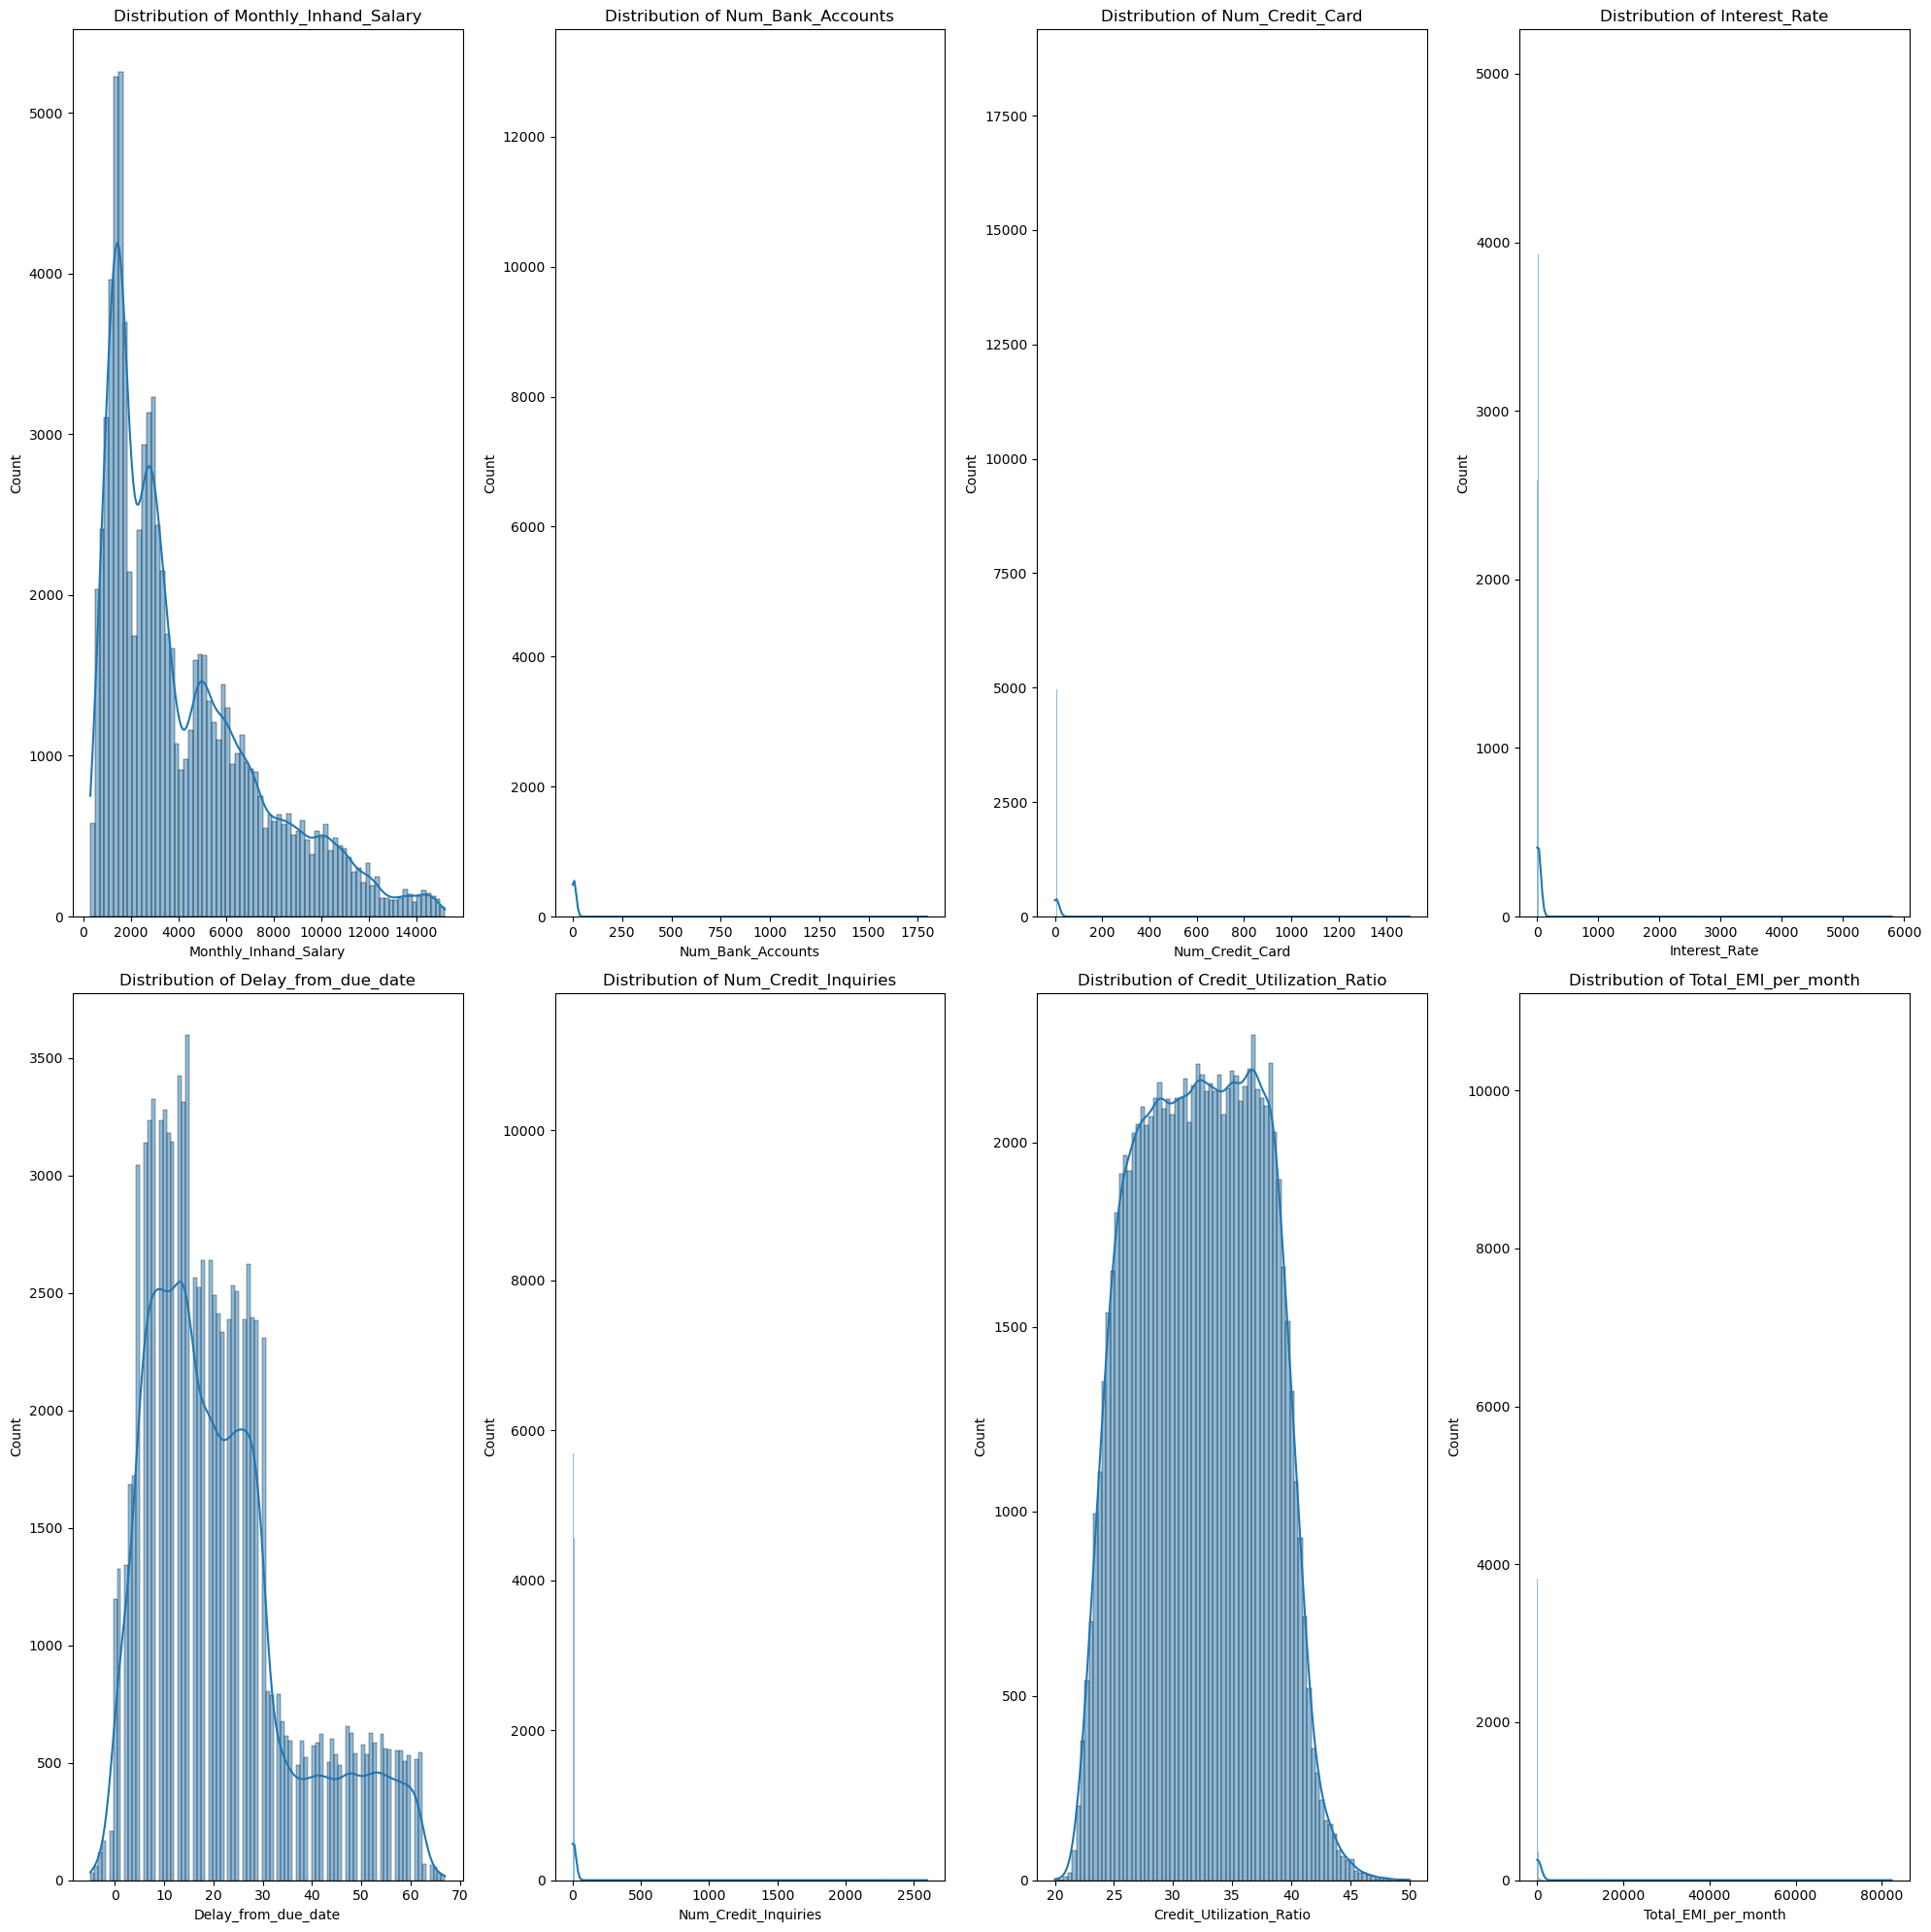

In [84]:
fig, axes = plt.subplots(2, 4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(credit_df.select_dtypes(include="number").columns):
    sns.histplot(credit_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### Distribution of each column

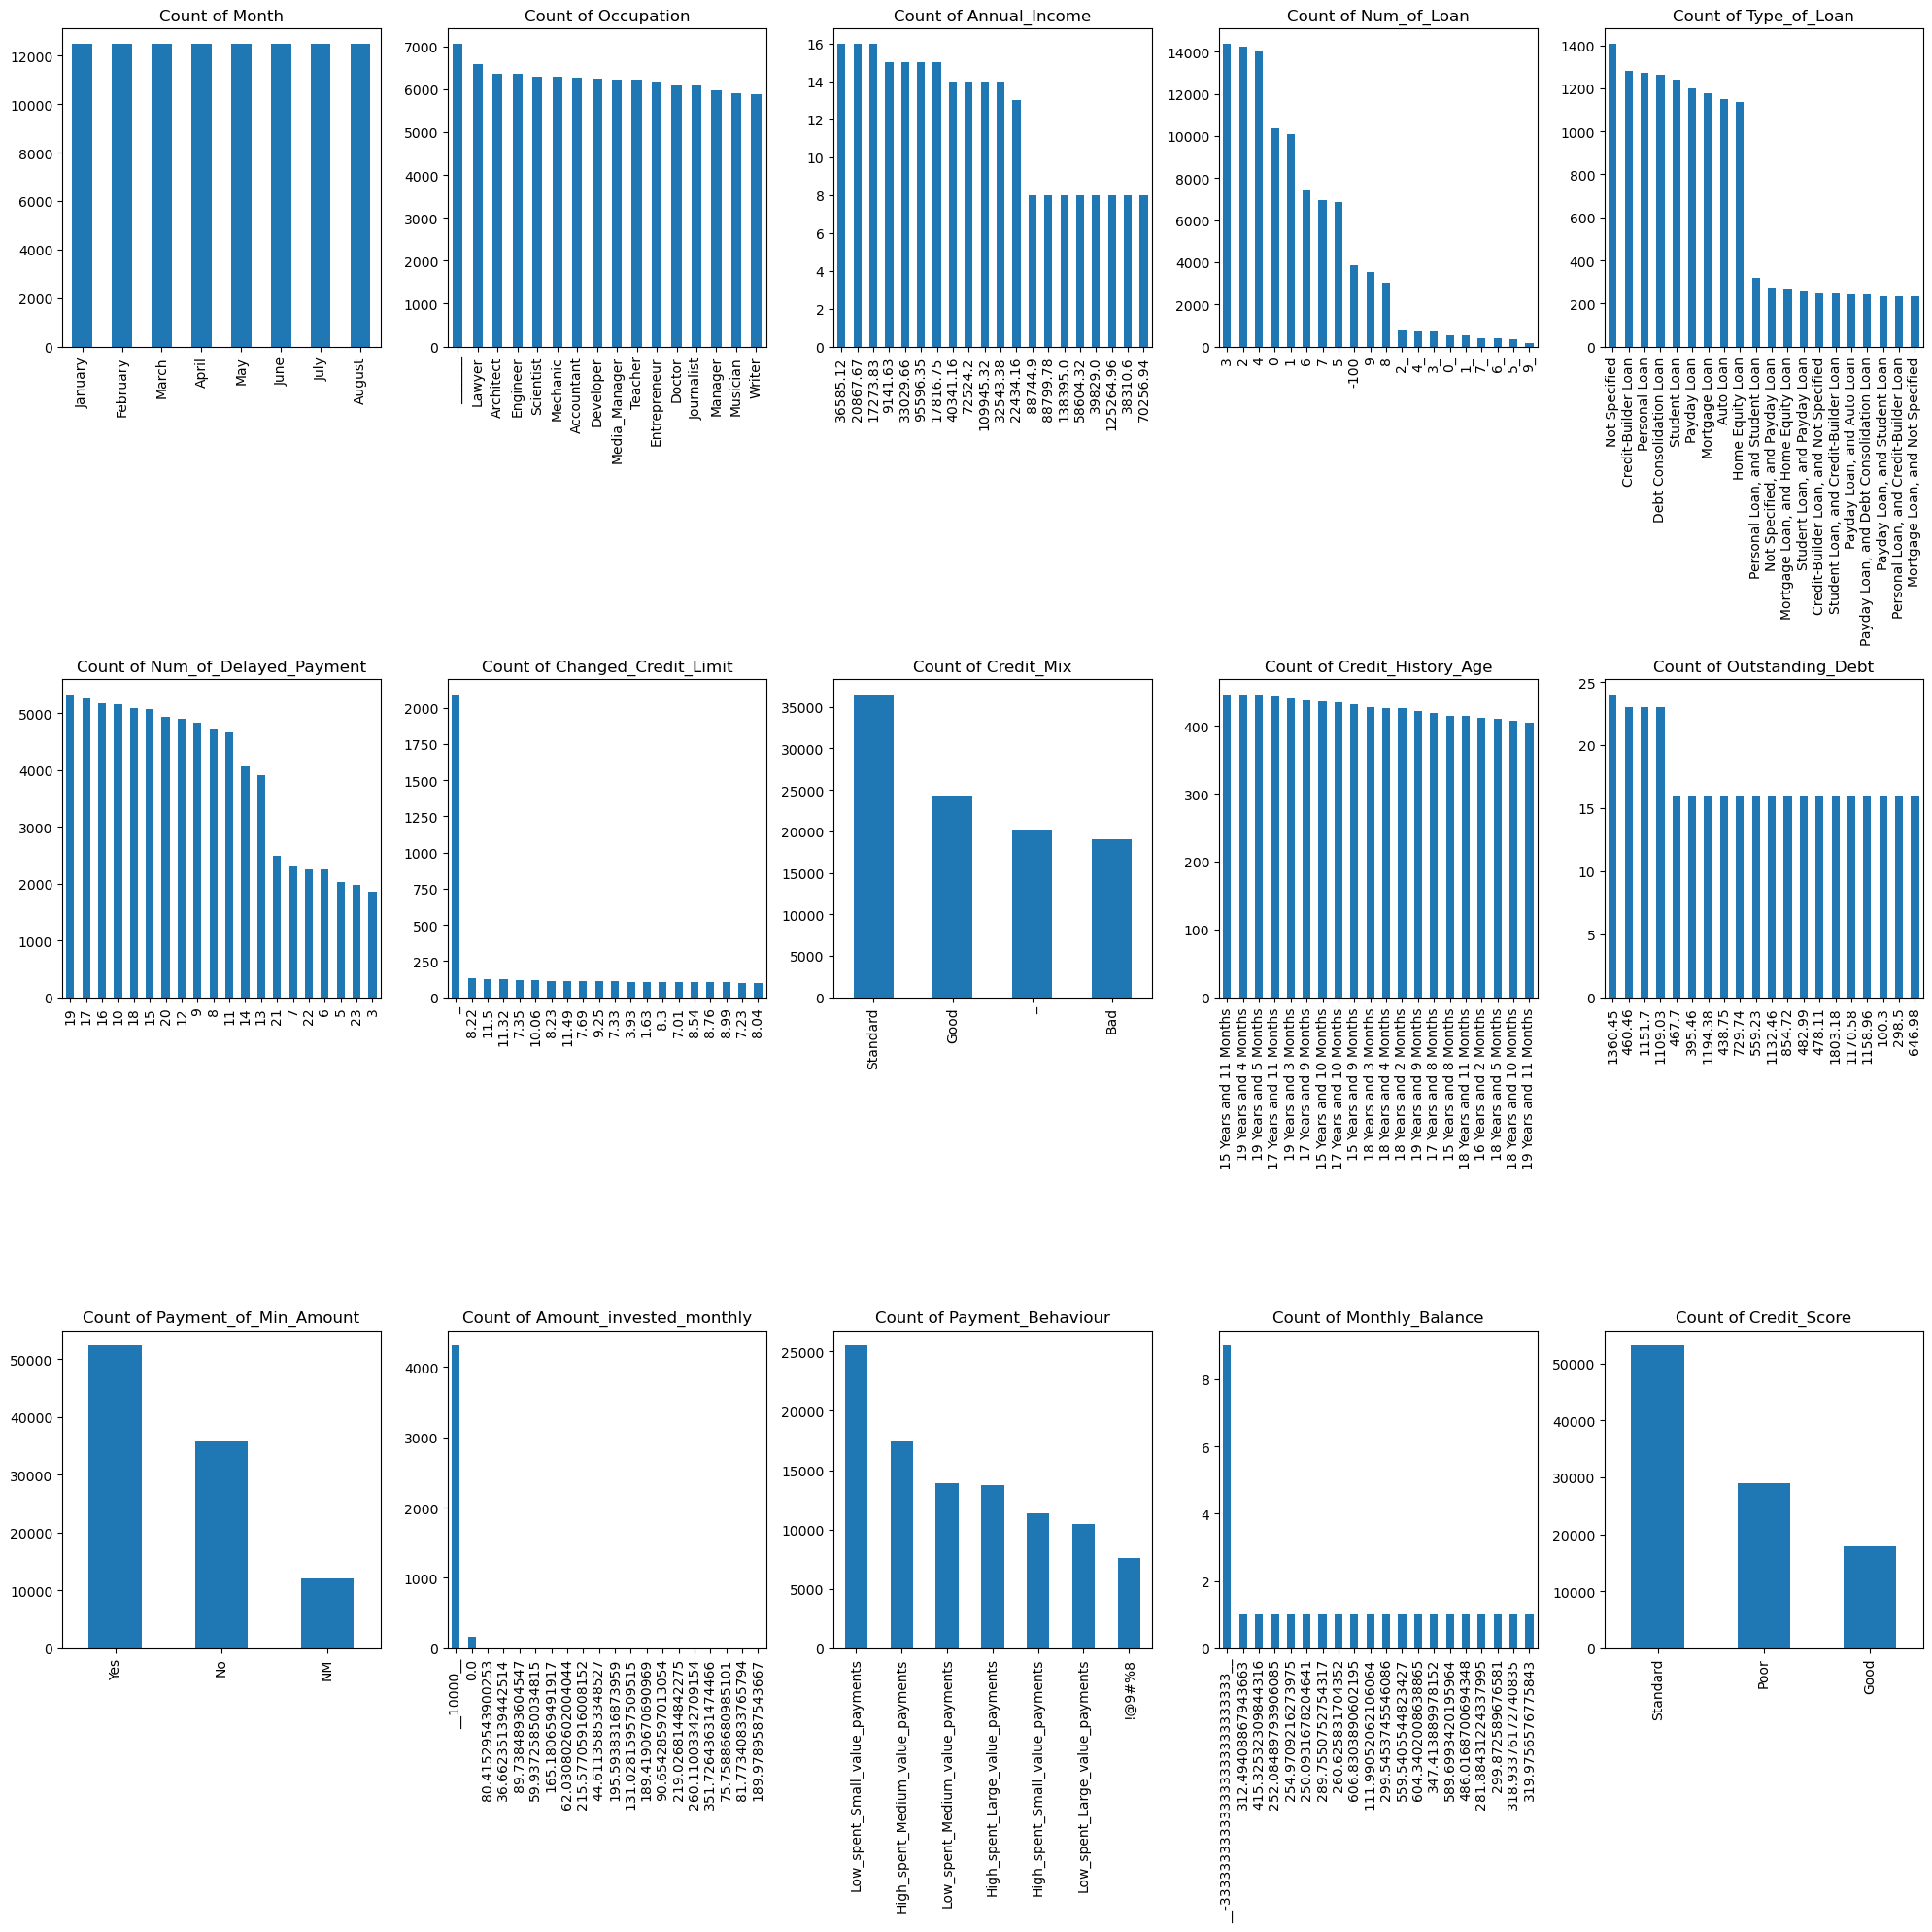

In [85]:
lst=["Month","Occupation","Annual_Income","Num_of_Loan","Type_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit",
    "Credit_Mix","Credit_History_Age","Outstanding_Debt","Payment_of_Min_Amount","Amount_invested_monthly","Payment_Behaviour",
    "Monthly_Balance","Credit_Score"]
fig, axes = plt.subplots(3, 5, figsize=(20, 20))
axes = axes.flatten()
for i,col in enumerate(lst):
    credit_df[col].value_counts(ascending = False).head(20).plot(kind = 'bar',ax=axes[i])
    #sns.countplot(credit_df[col], ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    #axes[i].tick_params(axis='x', rotation=45) 
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Credit_Score'>

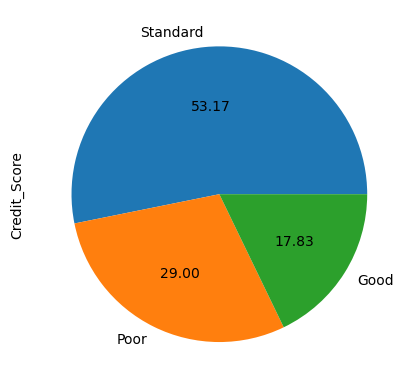

In [86]:
credit_df['Credit_Score'].value_counts().plot.pie(autopct='%.2f')

### Bivariate

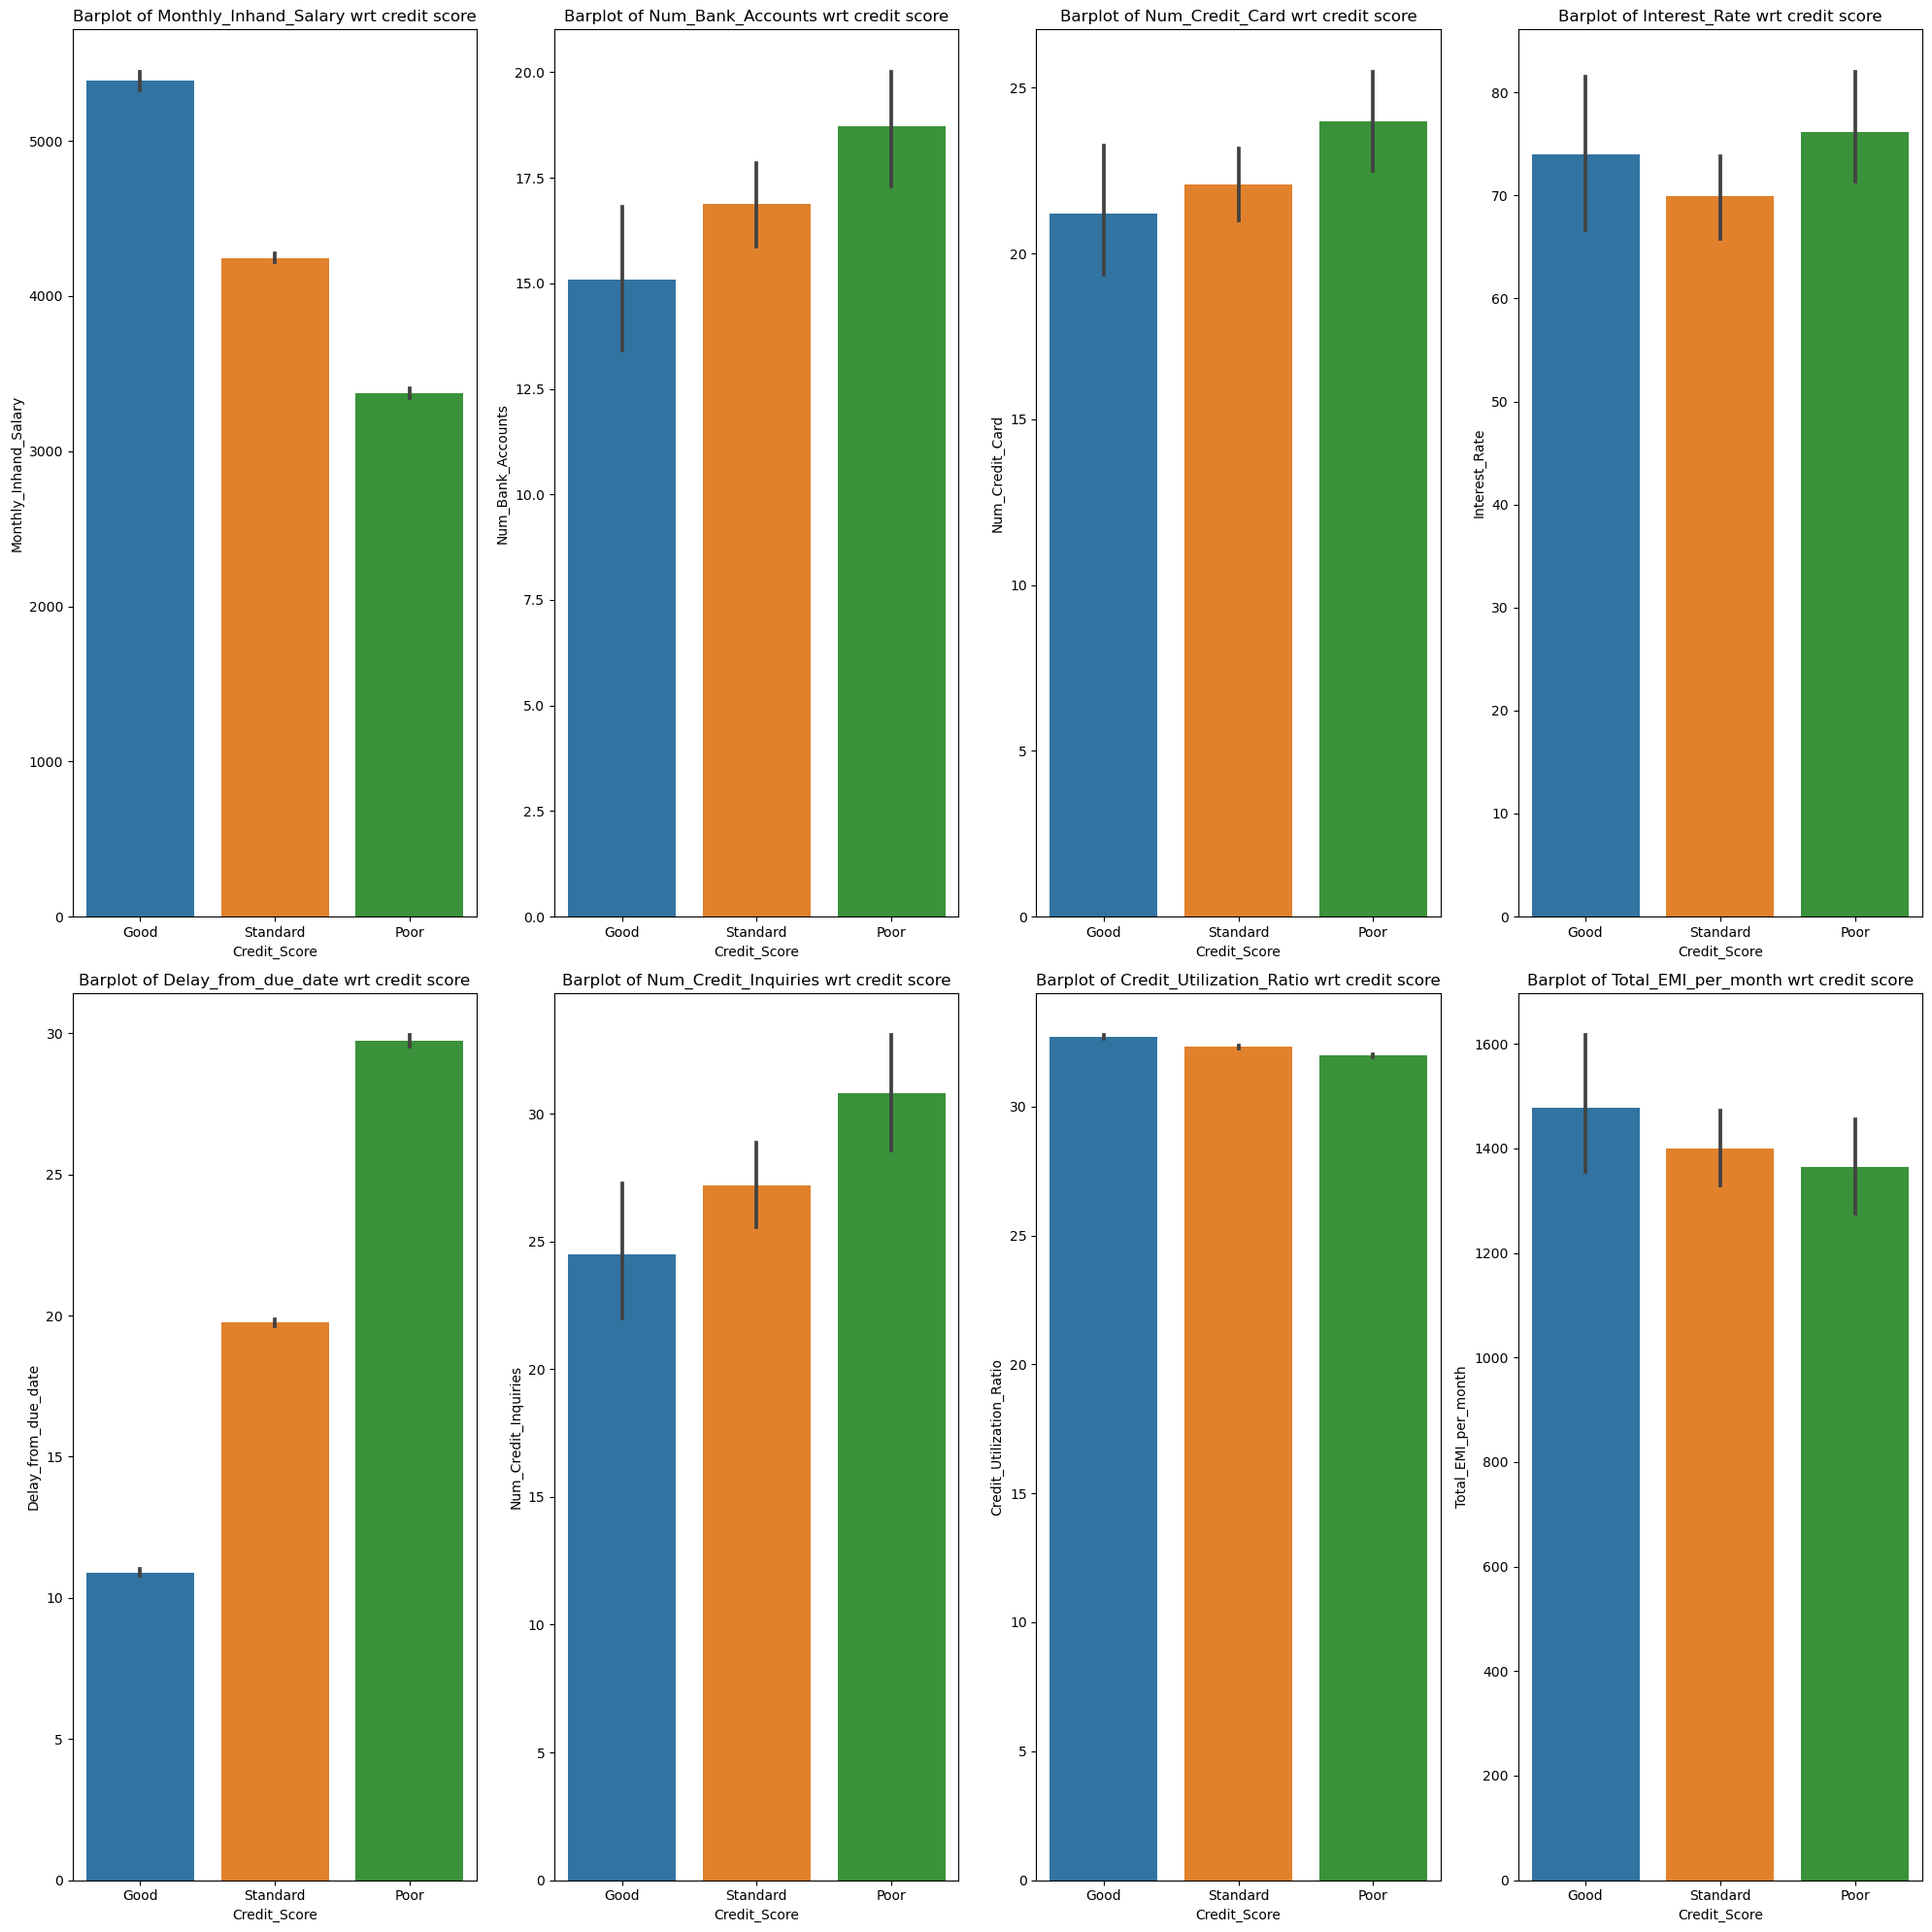

In [87]:
fig, axes = plt.subplots(2, 4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(credit_df.select_dtypes(include="number").columns):
    sns.barplot(data=credit_df,x="Credit_Score",y=col, ax=axes[i])
    axes[i].set_title(f'Barplot of {col} wrt credit score')
plt.tight_layout()
plt.show()

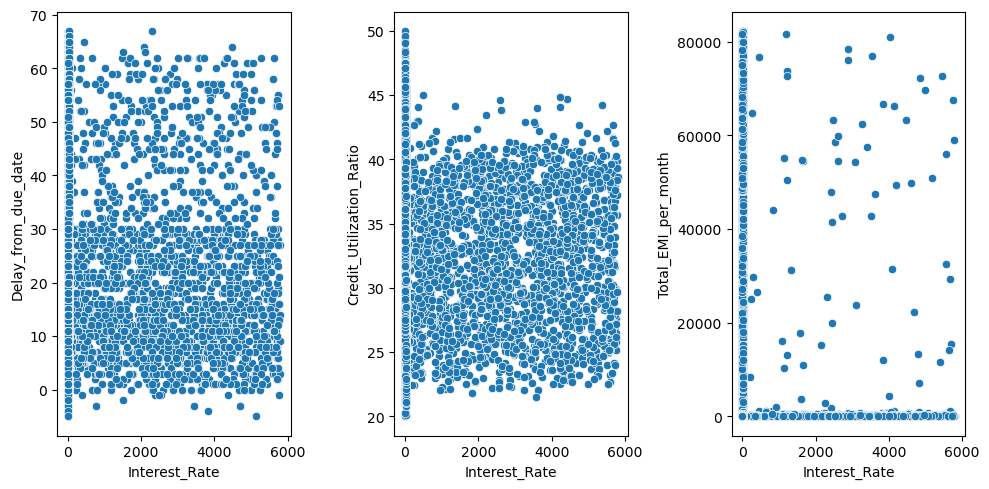

In [88]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
sns.scatterplot(data=credit_df,x="Interest_Rate",y='Delay_from_due_date',ax=axes[0])
sns.scatterplot(data=credit_df,x="Interest_Rate",y='Credit_Utilization_Ratio',ax=axes[1])
sns.scatterplot(data=credit_df,x="Interest_Rate",y='Total_EMI_per_month',ax=axes[2])
plt.tight_layout()
plt.show()

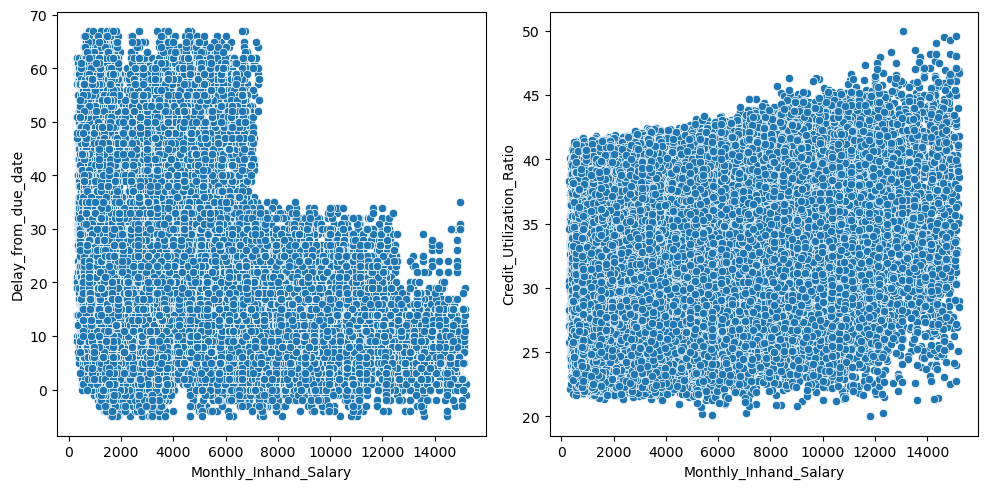

In [89]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=credit_df,x="Monthly_Inhand_Salary",y='Delay_from_due_date',ax=axes[0])
sns.scatterplot(data=credit_df,x="Monthly_Inhand_Salary",y='Credit_Utilization_Ratio',ax=axes[1])
#sns.scatterplot(data=credit_df,x="Interest_Rate",y='Total_EMI_per_month',ax=axes[2])
plt.tight_layout()
plt.show()

##### Negative correlation between Monthly_Inhand_Salary and Delay_from_due_date divided for particular intervals and positive correlation between  Monthly_Inhand_Salary and Credit_Utilization_Ratio

### Multivariate

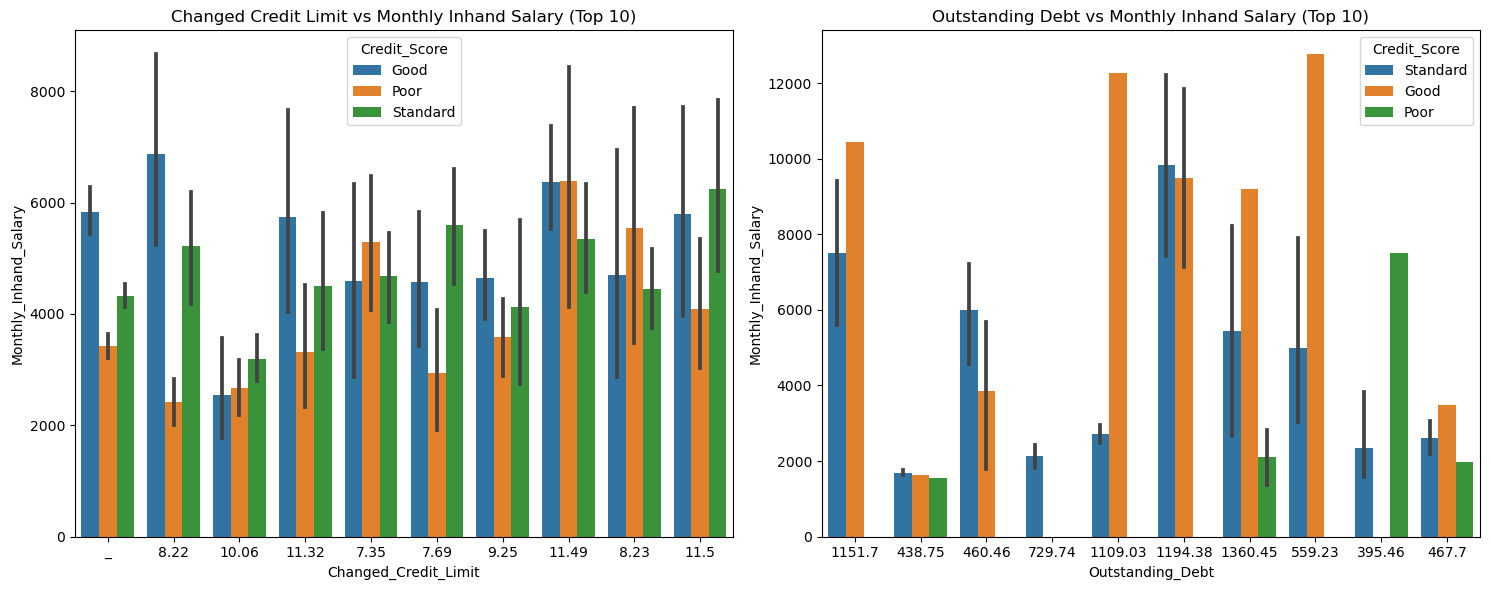

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# For "Changed_Credit_Limit"
top_changed_credit_limit = credit_df['Changed_Credit_Limit'].value_counts().index[:10]
filtered_df_1 = credit_df[credit_df['Changed_Credit_Limit'].isin(top_changed_credit_limit)]
sns.barplot(data=filtered_df_1, x="Changed_Credit_Limit", y='Monthly_Inhand_Salary', hue="Credit_Score", ax=axes[0])
axes[0].set_title('Changed Credit Limit vs Monthly Inhand Salary (Top 10)')

# For "Outstanding_Debt"
top_outstanding_debt = credit_df['Outstanding_Debt'].value_counts().index[:10]
filtered_df_2 = credit_df[credit_df['Outstanding_Debt'].isin(top_outstanding_debt)]
sns.barplot(data=filtered_df_2, x="Outstanding_Debt", y='Monthly_Inhand_Salary', hue="Credit_Score", ax=axes[1])
axes[1].set_title('Outstanding Debt vs Monthly Inhand Salary (Top 10)')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Num_Bank_Accounts'>

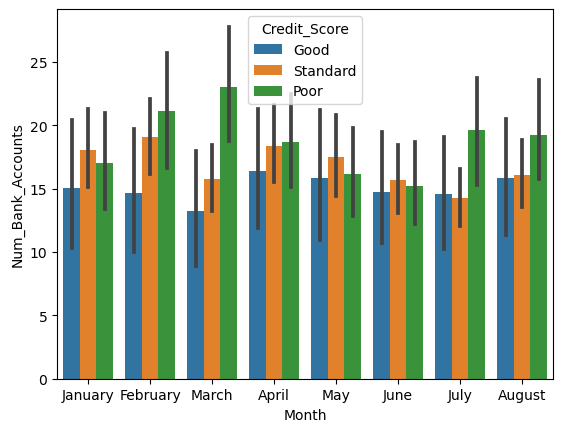

In [91]:
sns.barplot(data=credit_df, x="Month", y='Num_Bank_Accounts', hue="Credit_Score")

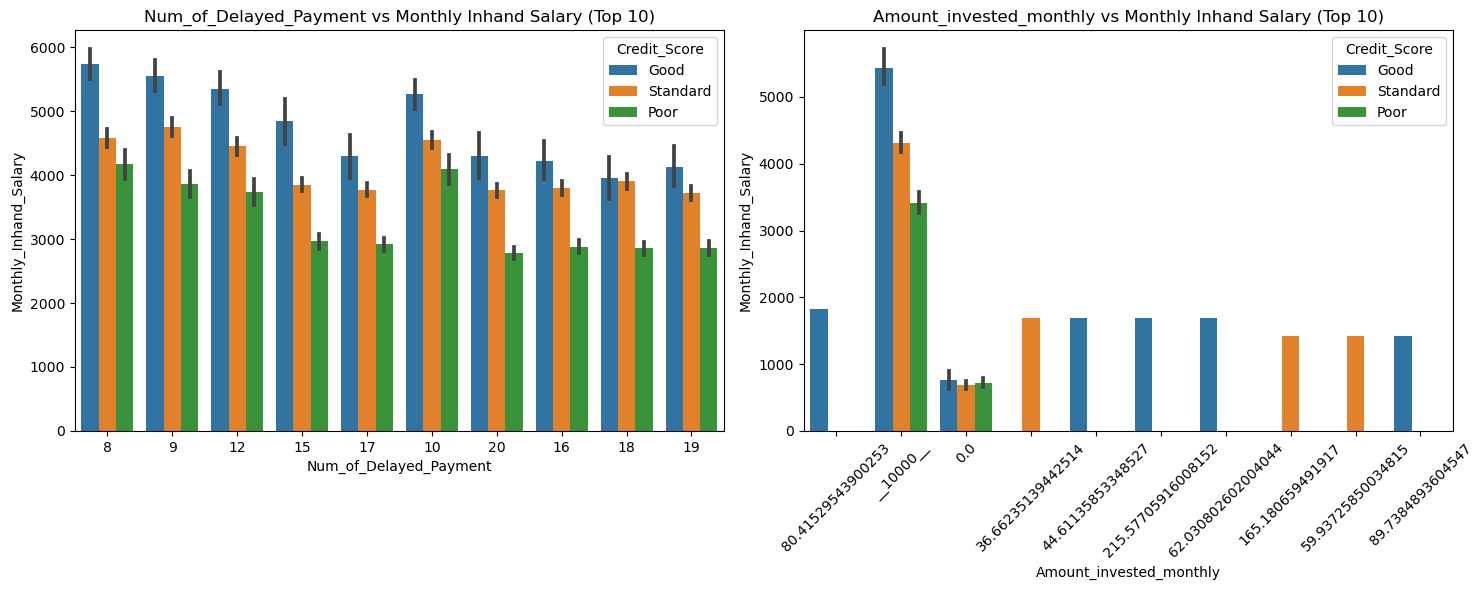

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# For "Changed_Credit_Limit"
top_changed_credit_limit = credit_df['Num_of_Delayed_Payment'].value_counts().index[:10]
filtered_df_1 = credit_df[credit_df['Num_of_Delayed_Payment'].isin(top_changed_credit_limit)]
sns.barplot(data=filtered_df_1, x="Num_of_Delayed_Payment", y='Monthly_Inhand_Salary', hue="Credit_Score", ax=axes[0])
axes[0].set_title('Num_of_Delayed_Payment vs Monthly Inhand Salary (Top 10)')

# For "Outstanding_Debt"
top_outstanding_debt = credit_df['Amount_invested_monthly'].value_counts().index[:10]
filtered_df_2 = credit_df[credit_df['Amount_invested_monthly'].isin(top_outstanding_debt)]
sns.barplot(data=filtered_df_2, x="Amount_invested_monthly", y='Monthly_Inhand_Salary', hue="Credit_Score", ax=axes[1])
axes[1].set_title('Amount_invested_monthly vs Monthly Inhand Salary (Top 10)')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

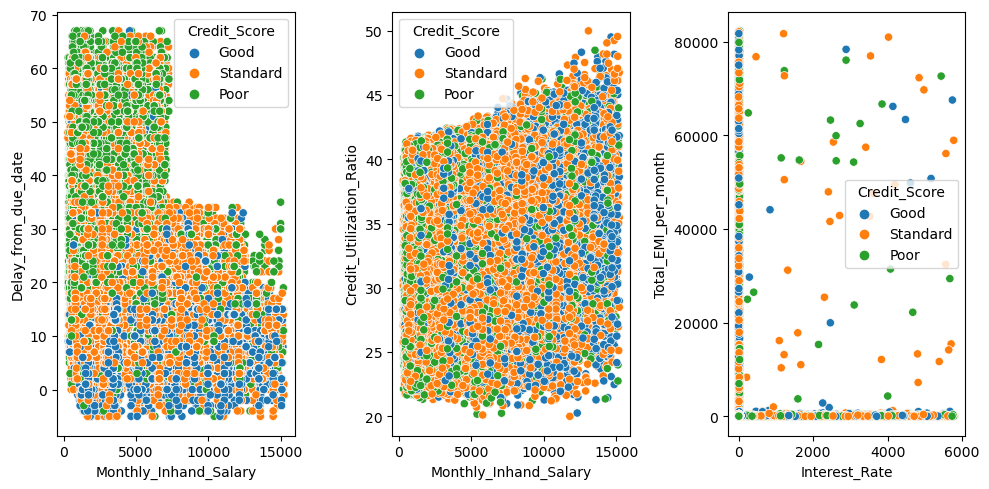

In [93]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
sns.scatterplot(data=credit_df,x="Monthly_Inhand_Salary",y='Delay_from_due_date',hue="Credit_Score",ax=axes[0])
sns.scatterplot(data=credit_df,x="Monthly_Inhand_Salary",y='Credit_Utilization_Ratio',hue="Credit_Score",ax=axes[1])
sns.scatterplot(data=credit_df,x="Interest_Rate",y='Total_EMI_per_month',hue="Credit_Score",ax=axes[2])
plt.tight_layout()
plt.show()

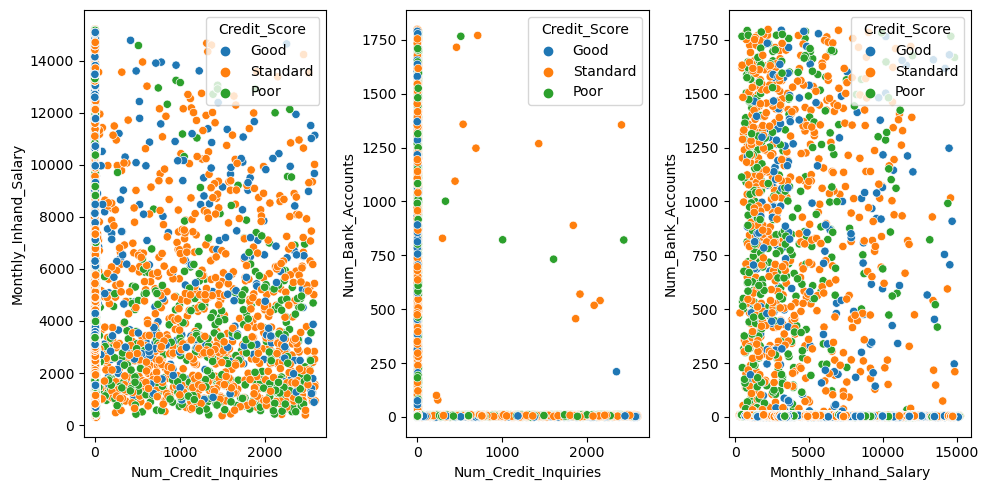

In [94]:
fig,axes=plt.subplots(1,3,figsize=(10,5))
sns.scatterplot(data=credit_df,x="Num_Credit_Inquiries",y='Monthly_Inhand_Salary',hue="Credit_Score",ax=axes[0])
sns.scatterplot(data=credit_df,x="Num_Credit_Inquiries",y='Num_Bank_Accounts',hue="Credit_Score",ax=axes[1])
sns.scatterplot(data=credit_df,x="Monthly_Inhand_Salary",y='Num_Bank_Accounts',hue="Credit_Score",ax=axes[2])
plt.tight_layout()
plt.show()

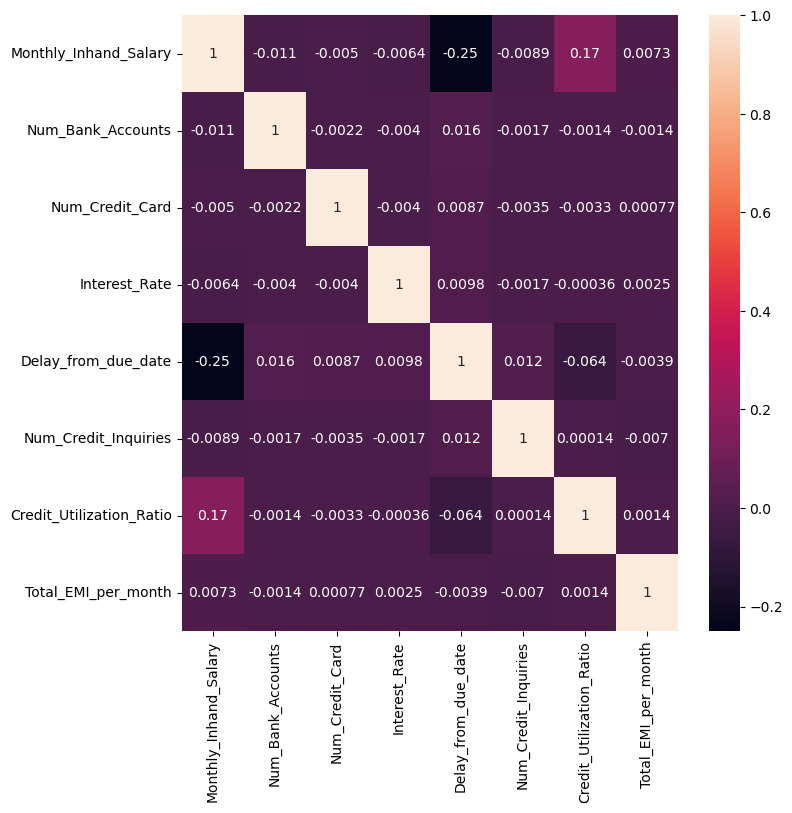

In [95]:
plt.figure(figsize=(8,8))
sns.heatmap(credit_df.select_dtypes(include="number").corr(),annot=True)
plt.show()

### Null Vall Detection

In [96]:
null=credit_df.isnull().sum()
null[null>0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

### Outlier Detection

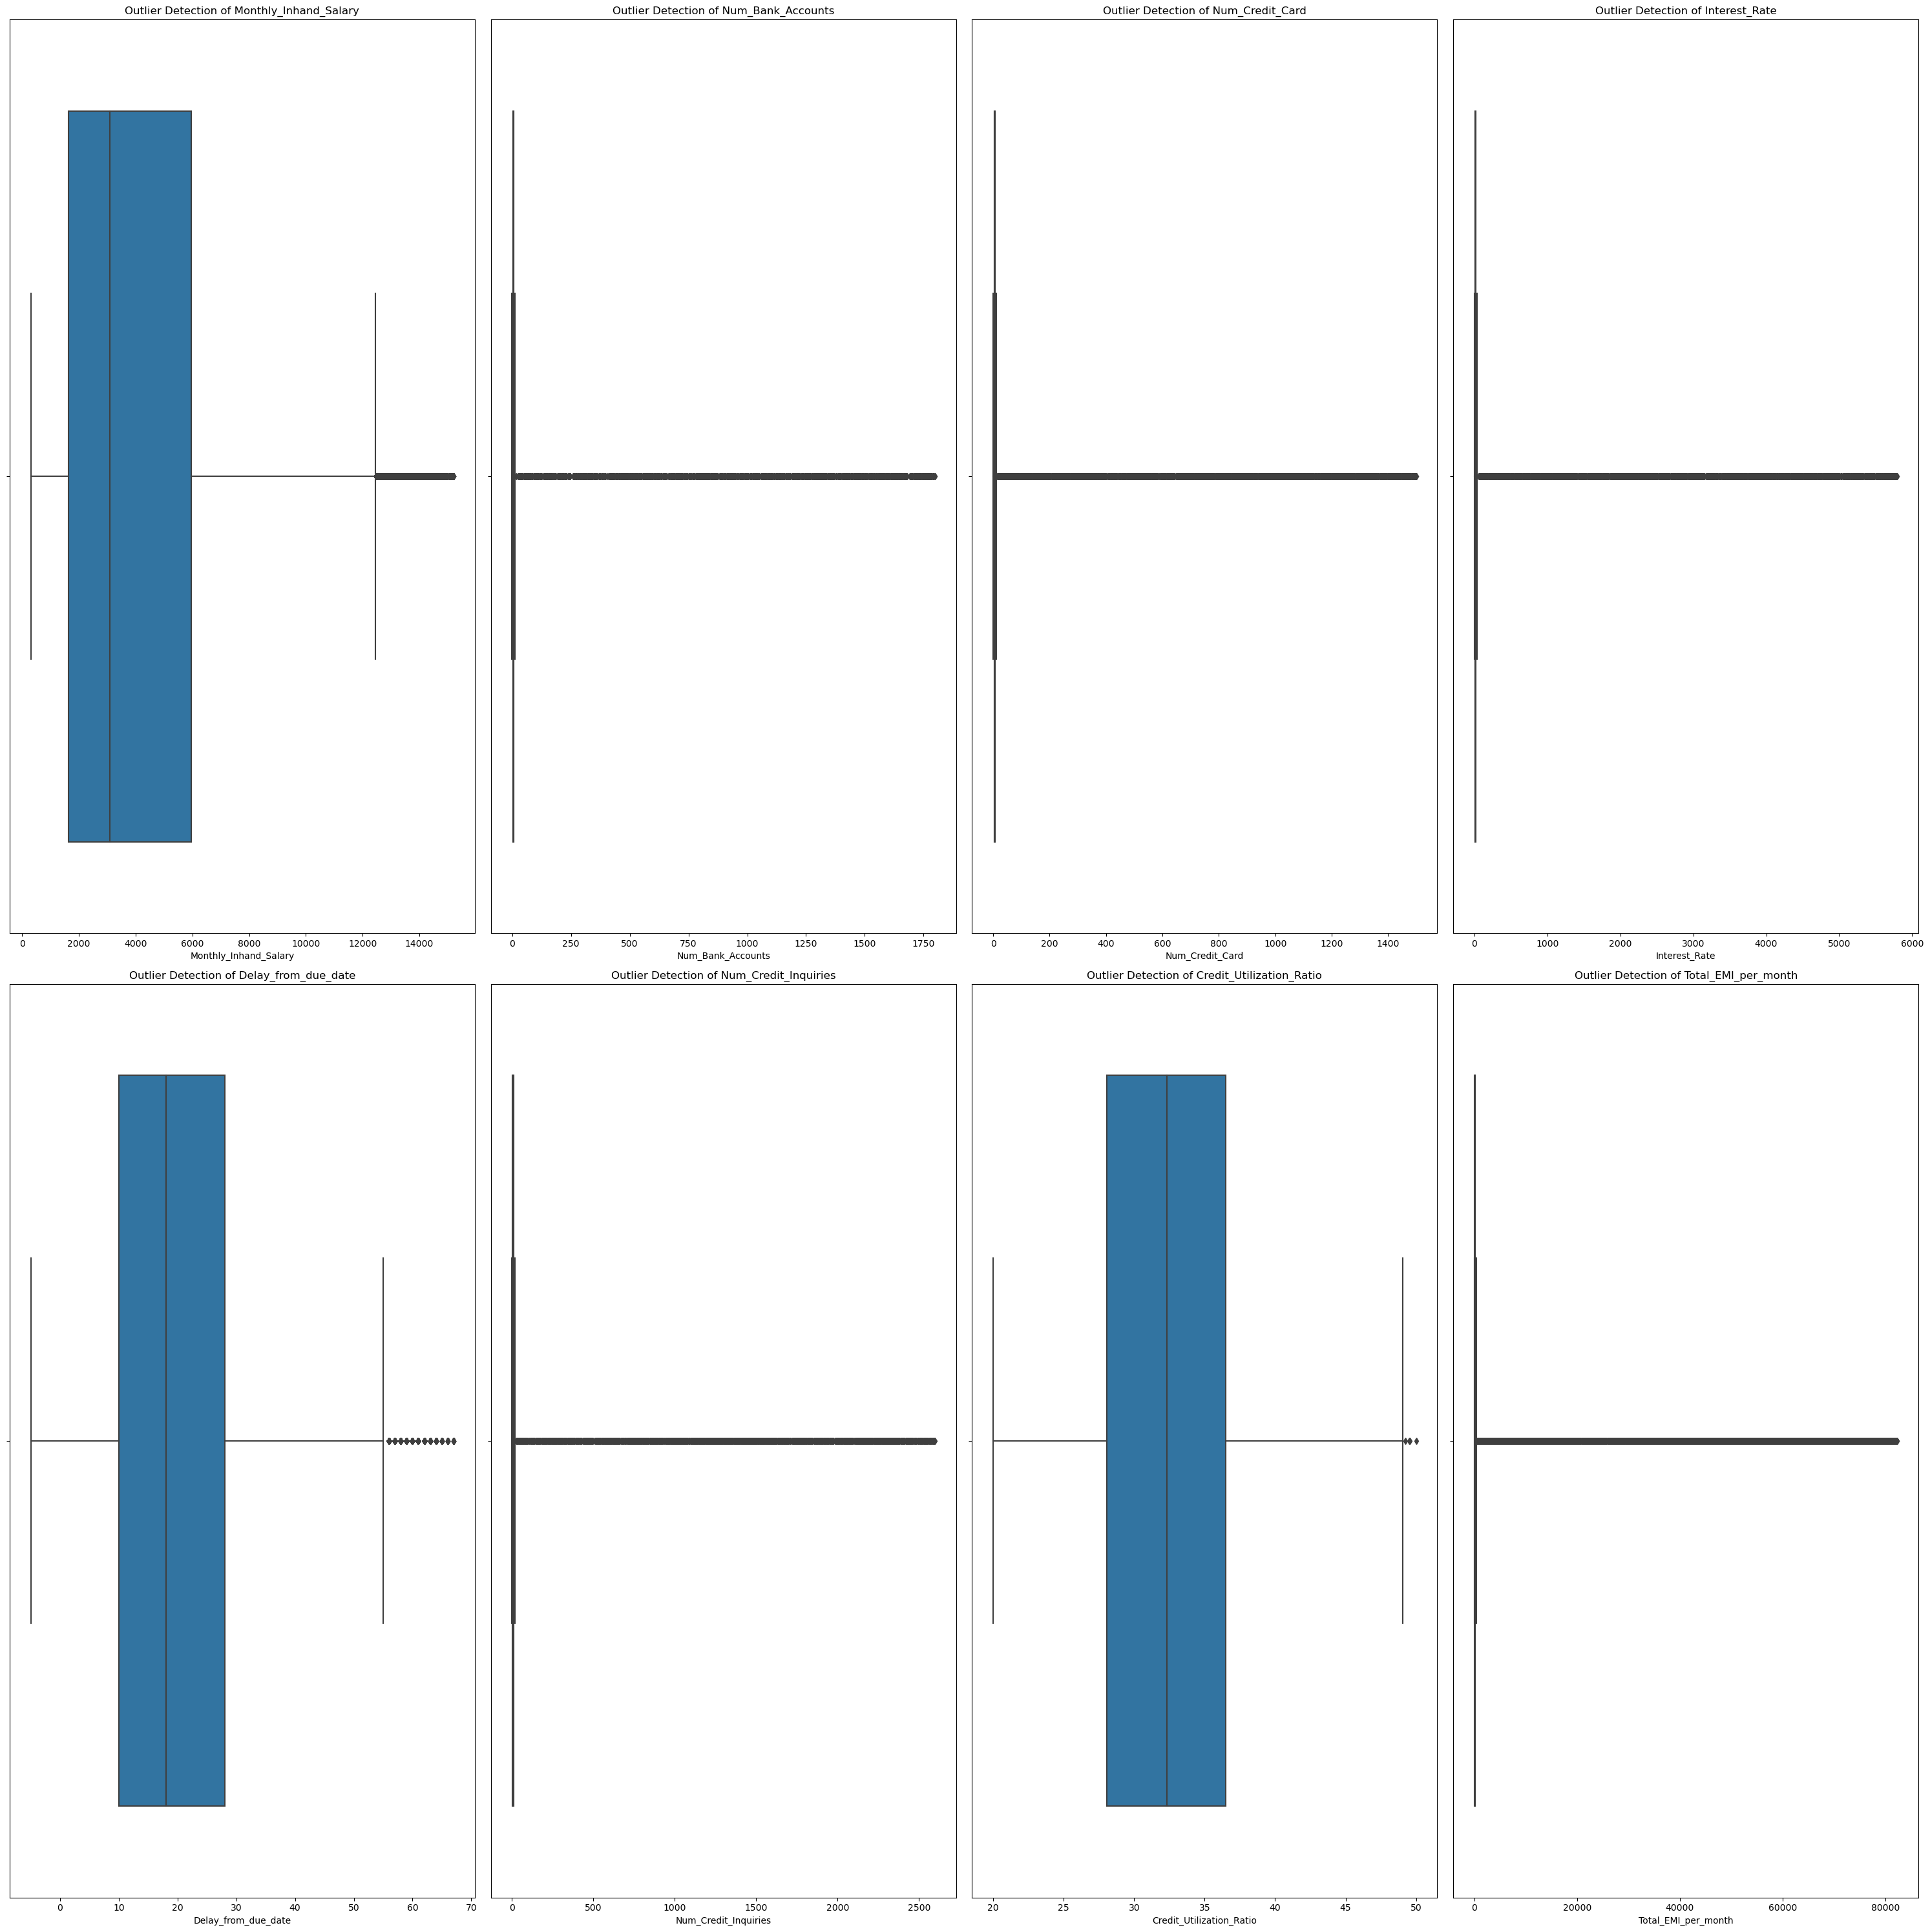

In [97]:
fig, axes = plt.subplots(2, 4, figsize=(30, 30))
axes = axes.flatten()
for i, col in enumerate(credit_df.select_dtypes(include="number").columns):
    sns.boxplot(credit_df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection of {col}')
plt.tight_layout()
plt.show()

### Transformation

In [3]:
credit_df.drop(["ID","Month","Name","Age","SSN"],axis=1,inplace=True)

In [4]:
credit_df['Amount_invested_monthly']=credit_df['Amount_invested_monthly'].str.replace('__', '', regex=False).astype("float")

In [5]:
credit_df['Num_of_Loan']=credit_df['Num_of_Loan'].str.replace('_', '', regex=False).astype("float")
credit_df['Num_of_Loan'].nunique()

414

In [6]:
credit_df['Num_of_Delayed_Payment']=credit_df['Num_of_Delayed_Payment'].str.replace('_', '', regex=False).astype("float")
credit_df.Num_of_Delayed_Payment.unique()

array([ 7.000e+00,        nan,  4.000e+00,  8.000e+00,  6.000e+00,
        1.000e+00, -1.000e+00,  3.000e+00,  0.000e+00,  5.000e+00,
        9.000e+00,  1.200e+01,  1.500e+01,  1.700e+01,  1.000e+01,
        2.000e+00,  1.100e+01,  1.400e+01,  2.000e+01,  2.200e+01,
        1.300e+01,  1.600e+01,  1.800e+01,  1.900e+01,  2.300e+01,
        2.400e+01,  2.100e+01,  3.318e+03,  3.083e+03,  1.338e+03,
        2.600e+01,  3.104e+03,  2.500e+01,  1.830e+02,  1.106e+03,
        8.340e+02,  2.672e+03,  2.008e+03, -3.000e+00,  5.380e+02,
        2.700e+01, -2.000e+00,  3.478e+03,  2.420e+03,  7.070e+02,
        7.080e+02,  3.815e+03,  2.800e+01,  1.867e+03,  2.250e+03,
        1.463e+03,  4.126e+03,  2.882e+03,  1.941e+03,  2.655e+03,
        2.628e+03,  1.320e+02,  3.069e+03,  3.060e+02,  3.539e+03,
        3.684e+03,  1.823e+03,  4.128e+03,  1.946e+03,  8.270e+02,
        2.297e+03,  2.566e+03,  9.040e+02,  1.820e+02,  9.290e+02,
        3.568e+03,  2.503e+03,  1.552e+03,  2.812e+03,  1.697e

In [7]:
credit_df['Changed_Credit_Limit']=credit_df['Changed_Credit_Limit'].str.replace('_', "")
credit_df['Changed_Credit_Limit']=credit_df['Changed_Credit_Limit'].replace('', np.nan)
credit_df.Changed_Credit_Limit.astype("float").unique()
#Changed_Credit_Limit

array([11.27,   nan,  6.27, ..., 17.51, 25.16, 21.17])

In [8]:
credit_df['Credit_Mix']=credit_df['Credit_Mix'].replace('_', np.nan)
credit_df.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [9]:
credit_df['Outstanding_Debt']=credit_df['Outstanding_Debt'].str.replace('_', "")
credit_df.Outstanding_Debt.unique()
credit_df['Outstanding_Debt']=credit_df['Outstanding_Debt'].replace("",np.nan)
credit_df.Outstanding_Debt=credit_df.Outstanding_Debt.astype("float")

In [10]:
credit_df['Payment_Behaviour']=credit_df['Payment_Behaviour'].str.replace('!@9#%8', "")
#credit_df.Outstanding_Debt.unique()
credit_df['Payment_Behaviour']=credit_df['Payment_Behaviour'].replace("",np.nan)
#credit_df.Outstanding_Debt.astype("float").unique()
credit_df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [11]:
credit_df['Monthly_Balance']=credit_df['Monthly_Balance'].str.replace('_', "")
#credit_df.Outstanding_Debt.unique()
credit_df['Monthly_Balance']=credit_df['Monthly_Balance'].replace("",np.nan)
#credit_df.Outstanding_Debt.astype("float").unique()
credit_df.Monthly_Balance=credit_df.Monthly_Balance.astype("float")

In [12]:
credit_df['Changed_Credit_Limit']=credit_df['Changed_Credit_Limit'].str.replace('_', "")
#credit_df.Outstanding_Debt.unique()
#credit_df['Monthly_Balance']=credit_df['Monthly_Balance'].replace("",np.nan)
#credit_df.Outstanding_Debt.astype("float").unique()
credit_df.Changed_Credit_Limit=credit_df.Changed_Credit_Limit.astype("float")

In [13]:
credit_df['Annual_Income']=credit_df['Annual_Income'].str.replace('_', "")
#credit_df.Outstanding_Debt.unique()
#credit_df['Monthly_Balance']=credit_df['Monthly_Balance'].replace("",np.nan)
#credit_df.Outstanding_Debt.astype("float").unique()
credit_df.Annual_Income=credit_df.Annual_Income.astype("float")
credit_df.Annual_Income.unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [14]:
credit_df['Occupation']=credit_df['Occupation'].replace('_______', np.nan)
credit_df.Occupation.unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [110]:
credit_df

Customer_ID Occupation  Annual_Income  Monthly_Inhand_Salary  \
0       CUS_0xd40  Scientist       19114.12            1824.843333   
1       CUS_0xd40  Scientist       19114.12                    NaN   
2       CUS_0xd40  Scientist       19114.12                    NaN   
3       CUS_0xd40  Scientist       19114.12                    NaN   
4       CUS_0xd40  Scientist       19114.12            1824.843333   
...           ...        ...            ...                    ...   
99995  CUS_0x942c   Mechanic       39628.99            3359.415833   
99996  CUS_0x942c   Mechanic       39628.99            3359.415833   
99997  CUS_0x942c   Mechanic       39628.99            3359.415833   
99998  CUS_0x942c   Mechanic       39628.99            3359.415833   
99999  CUS_0x942c   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3          4.0   
1                      3                4              3          4.0   
2                      3                4              3          4.0   
3                      3                4              3          4.0   
4                      3                4              3          4.0   
...                  ...              ...            ...          ...   
99995                  4                6              7          2.0   
99996                  4                6              7          2.0   
99997                  4                6           5729          2.0   
99998                  4                6              7          2.0   
99999                  4                6              7          2.0   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...         

# Feature Engineering

### Outlier Handling

In [15]:
def handle_outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    df[col]=df[col].clip(l,u)

In [16]:
for col in credit_df.select_dtypes(include="number").columns:
    #print(col)
    handle_outlier(credit_df,col)

In [17]:
credit_df.Credit_Mix.unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

### Null Value Handling

In [114]:
print(list(credit_df.select_dtypes(include="number")))
print(list(credit_df.select_dtypes(include="object")))

['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [115]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [122]:
null=credit_df.isnull().sum()
print(null[null>0])

Series([], dtype: int64)


In [17]:
knn_imputer = KNNImputer(n_neighbors=20)
l=["Monthly_Inhand_Salary","Num_of_Delayed_Payment","Num_Credit_Inquiries","Amount_invested_monthly","Changed_Credit_Limit",
  "Monthly_Balance"]
for col in l:
    credit_df[col]=knn_imputer.fit_transform(credit_df[[col]])
#credit_df.Num_Credit_Inquiries=knn_imputer.fit_transform(credit_df[["Num_Credit_Inquiries"]])

In [18]:
credit_df["Delay_from_due_date"]=knn_imputer.fit_transform(credit_df[["Delay_from_due_date"]])
credit_df["Changed_Credit_Limit"]=knn_imputer.fit_transform(credit_df[["Changed_Credit_Limit"]])

In [19]:
mode_imputer = SimpleImputer(strategy='most_frequent')
for i in ['Type_of_Loan',"Credit_Mix","Credit_History_Age","Payment_Behaviour"]:
    credit_df[i] = mode_imputer.fit_transform(credit_df[[i]])

In [20]:
credit_df.Occupation= mode_imputer.fit_transform(credit_df[["Occupation"]])

In [21]:
credit_df

Customer_ID Occupation  Annual_Income  Monthly_Inhand_Salary  \
0       CUS_0xd40  Scientist       19114.12            1824.843333   
1       CUS_0xd40  Scientist       19114.12            4167.185807   
2       CUS_0xd40  Scientist       19114.12            4167.185807   
3       CUS_0xd40  Scientist       19114.12            4167.185807   
4       CUS_0xd40  Scientist       19114.12            1824.843333   
...           ...        ...            ...                    ...   
99995  CUS_0x942c   Mechanic       39628.99            3359.415833   
99996  CUS_0x942c   Mechanic       39628.99            3359.415833   
99997  CUS_0x942c   Mechanic       39628.99            3359.415833   
99998  CUS_0x942c   Mechanic       39628.99            3359.415833   
99999  CUS_0x942c   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0           38.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                 -1.0   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                 23.0   
99996                        Auto Loan, and Student Loan                 18.0   
99997                        Auto Loan, and Student Loan                 27.0   
99998                        Auto Loan, and Student Loan                 20.0   
99999                        Auto Loan, and Student Loan                 18.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...    Standard            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...    Standard            502.38                 34.663572   
99996  ...    Standard            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1      15 Years and 11 Months                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...         

### Data Transformation

In [20]:
len(credit_df.select_dtypes(include="number").columns)

15

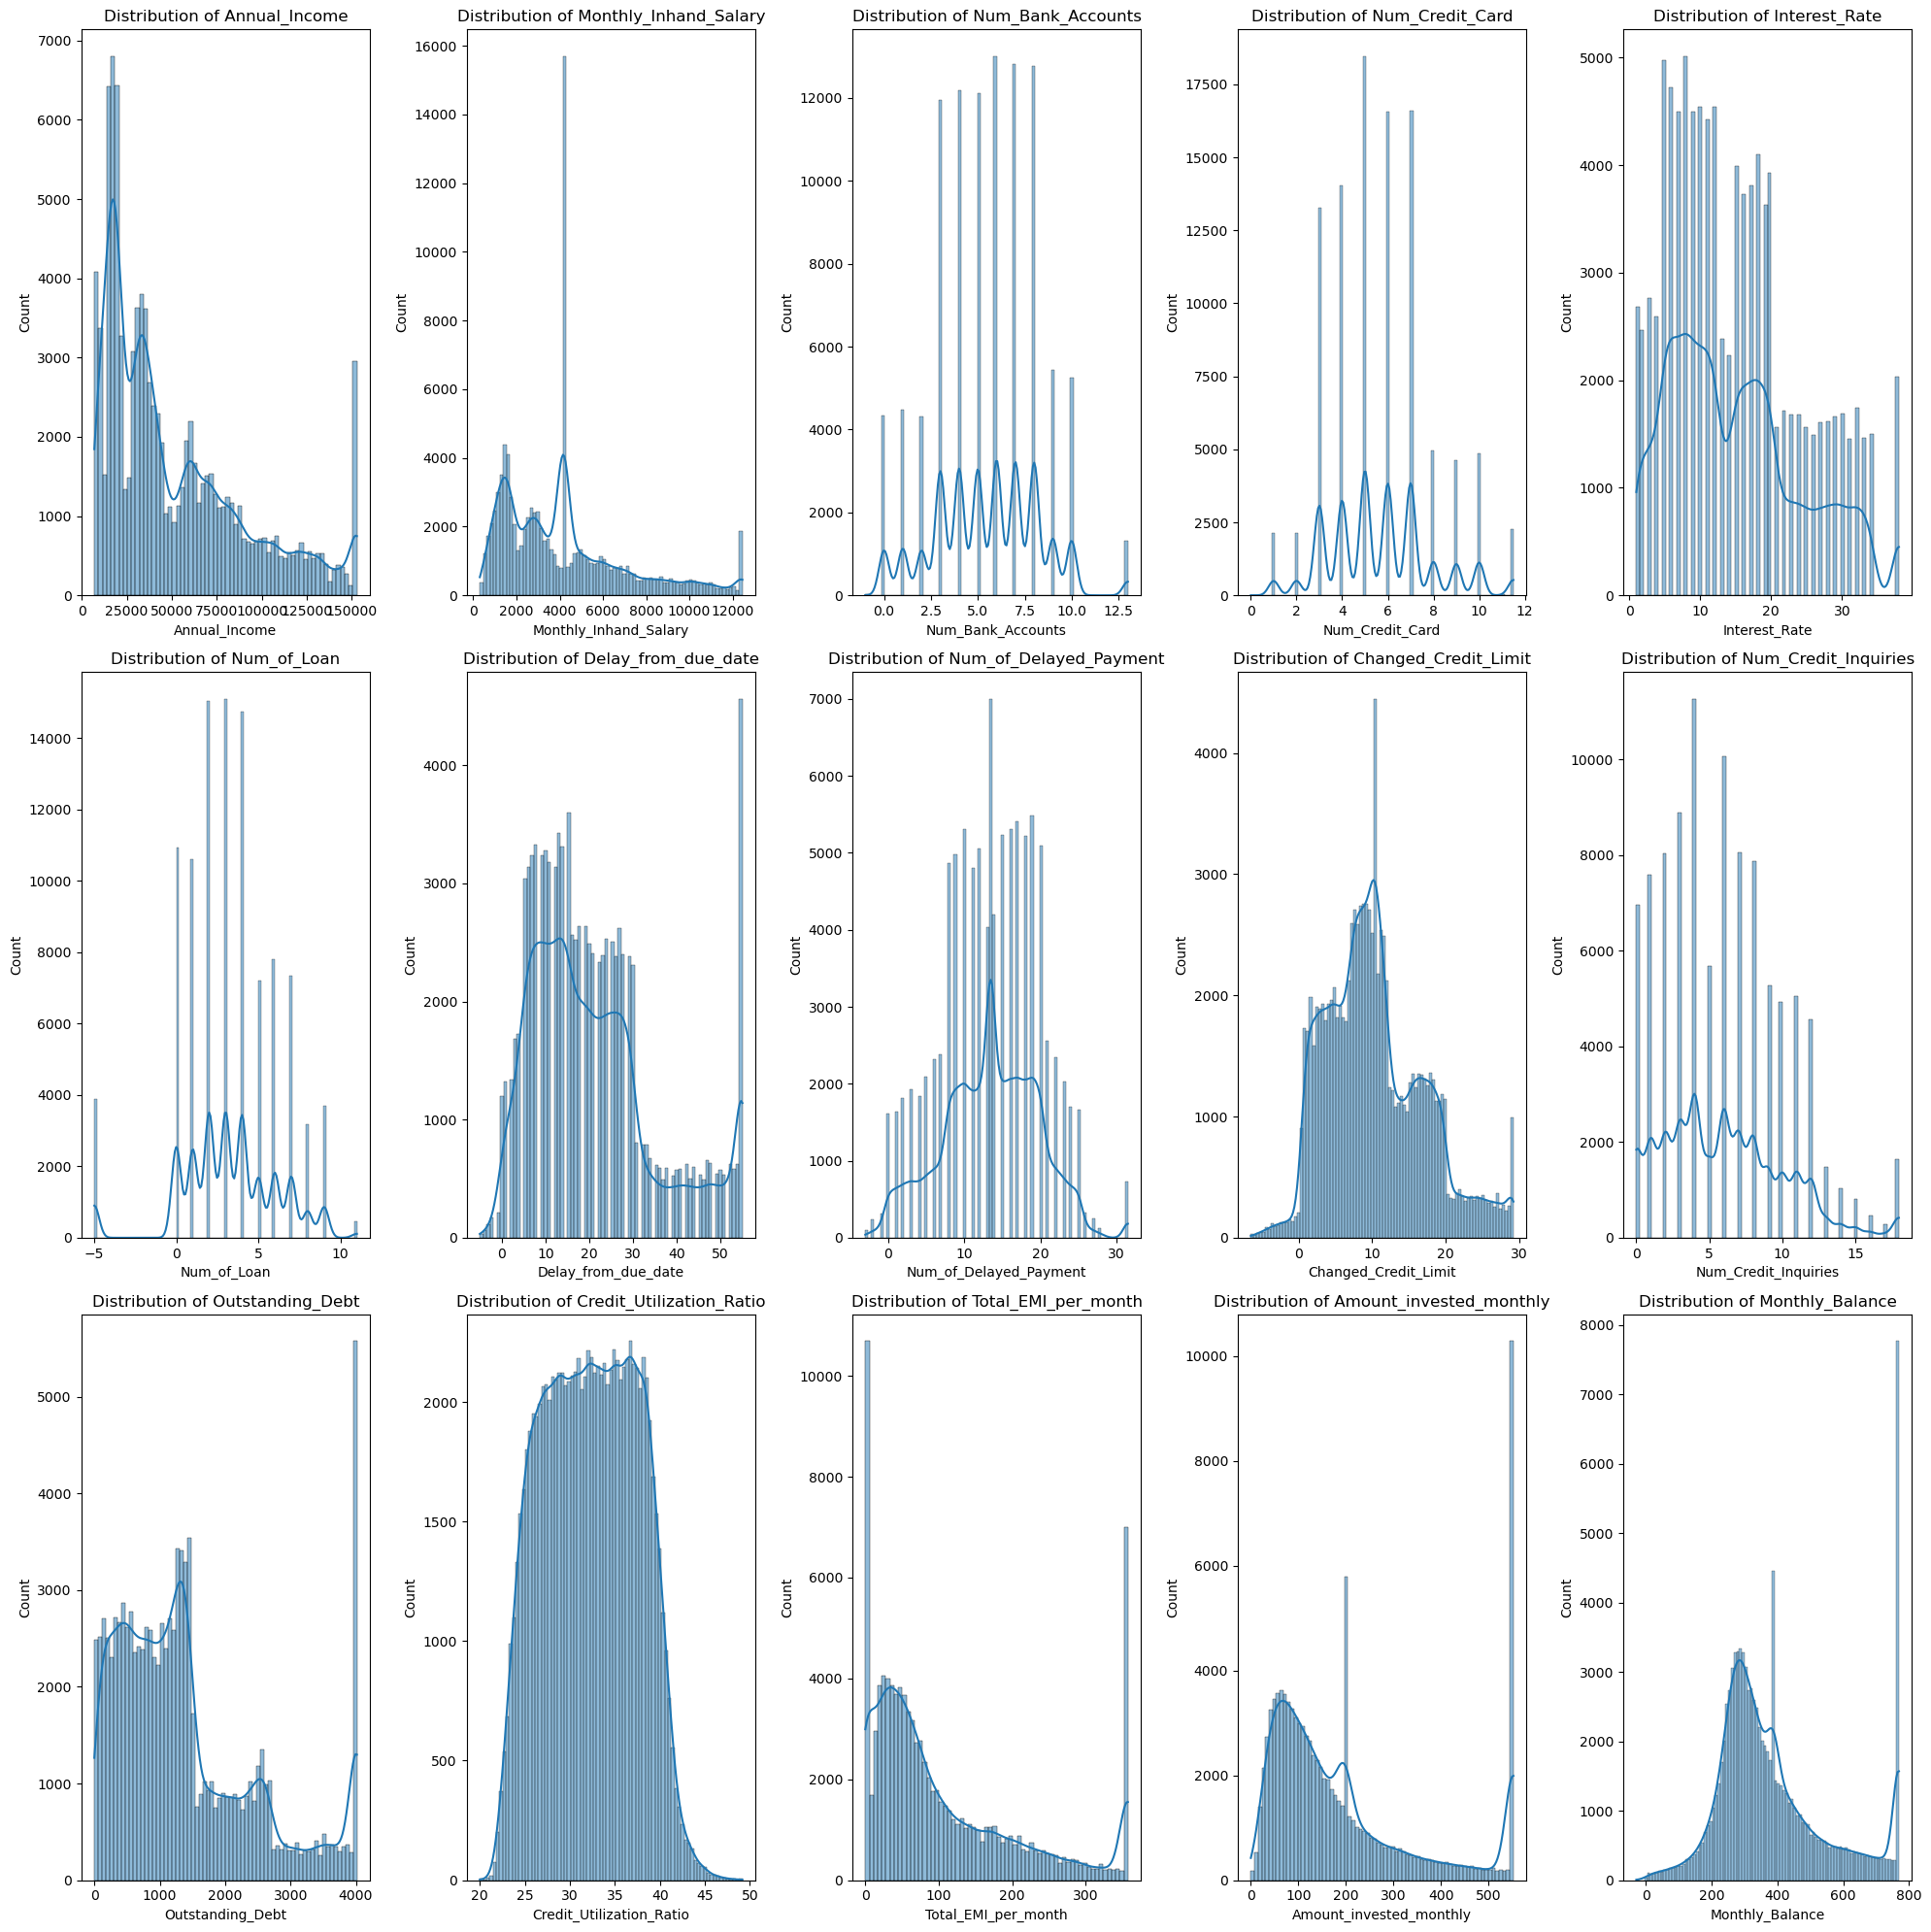

In [21]:
fig, axes = plt.subplots(3, 5, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(credit_df.select_dtypes(include="number").columns):
    sns.histplot(credit_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### Right-skewed data

In [22]:
right_skew=["Annual_Income","Monthly_Inhand_Salary","Interest_Rate","Delay_from_due_date","Changed_Credit_Limit"
           "Outstanding_Debt","Total_EMI_per_month","Amount_invested_monthly"]
pt=PowerTransformer(method="yeo-johnson")
quantile = QuantileTransformer(output_distribution='normal', random_state=0)

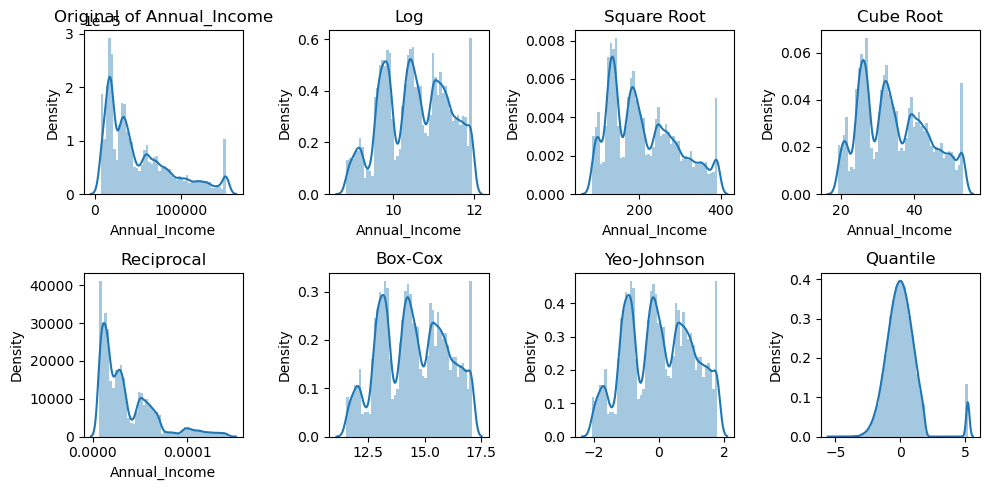

In [25]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Annual_Income"],ax=axes[0,0]).set_title('Original of Annual_Income')
sns.distplot(np.log(credit_df["Annual_Income"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Annual_Income"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Annual_Income"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Annual_Income"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Annual_Income"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Annual_Income"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Annual_Income"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [21]:
credit_df["Annual_Income"]=np.log(credit_df["Annual_Income"])

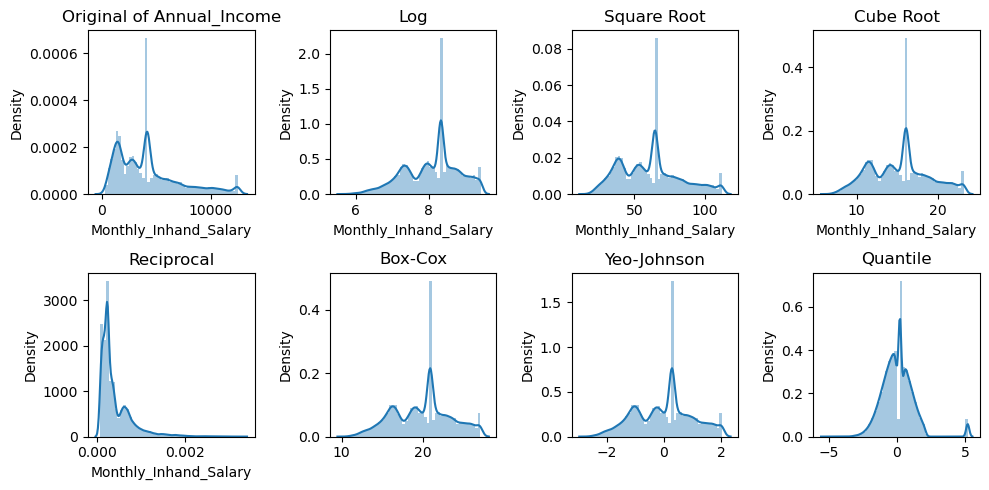

In [27]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Monthly_Inhand_Salary"],ax=axes[0,0]).set_title('Original of Annual_Income')
sns.distplot(np.log(credit_df["Monthly_Inhand_Salary"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Monthly_Inhand_Salary"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Monthly_Inhand_Salary"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Monthly_Inhand_Salary"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Monthly_Inhand_Salary"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Monthly_Inhand_Salary"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Monthly_Inhand_Salary"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [22]:
box_cox_dfz,_=stats.boxcox(credit_df["Monthly_Inhand_Salary"])
credit_df["Monthly_Inhand_Salary"]=box_cox_dfz

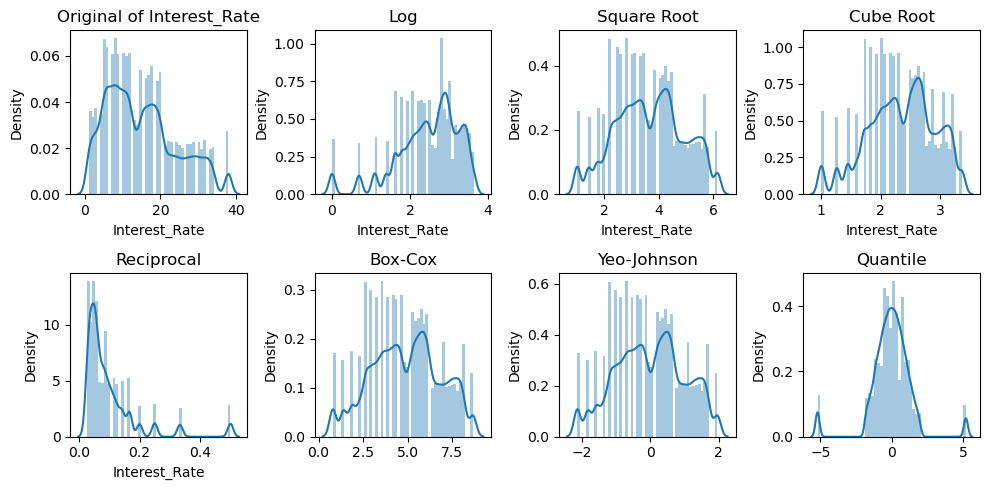

In [29]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Interest_Rate"],ax=axes[0,0]).set_title('Original of Interest_Rate')
sns.distplot(np.log(credit_df["Interest_Rate"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Interest_Rate"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Interest_Rate"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Interest_Rate"]+1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Interest_Rate"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Interest_Rate"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Interest_Rate"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [23]:
box_cox_dfz,_=stats.boxcox(credit_df["Interest_Rate"])
credit_df["Interest_Rate"]=box_cox_dfz

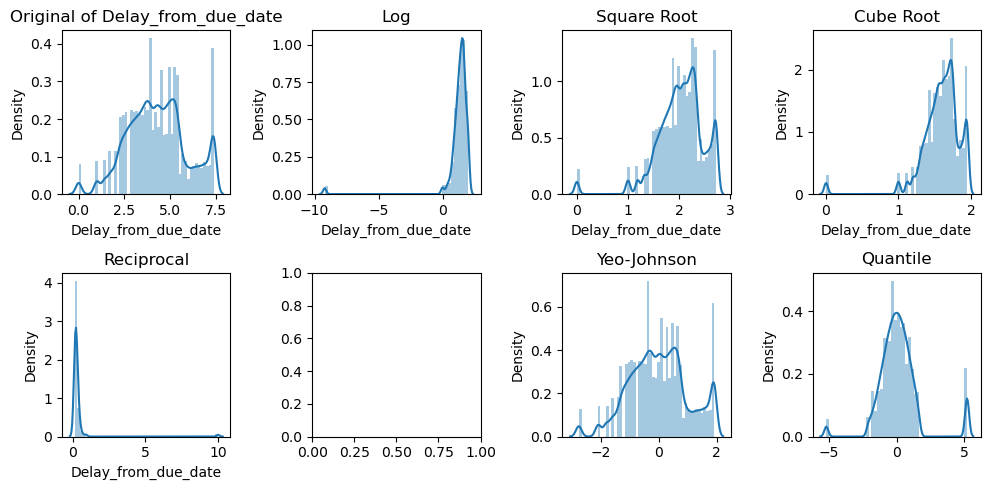

In [63]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Delay_from_due_date"],ax=axes[0,0]).set_title('Original of Delay_from_due_date')
sns.distplot(np.log(credit_df["Delay_from_due_date"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Delay_from_due_date"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Delay_from_due_date"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Delay_from_due_date"]+0.1),ax=axes[1,0]).set_title('Reciprocal')
#box_cox_dfz,_=stats.boxcox(credit_df["Delay_from_due_date"])
#sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Delay_from_due_date"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Delay_from_due_date"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [24]:
credit_df["Delay_from_due_date"]=np.sqrt(credit_df["Delay_from_due_date"])

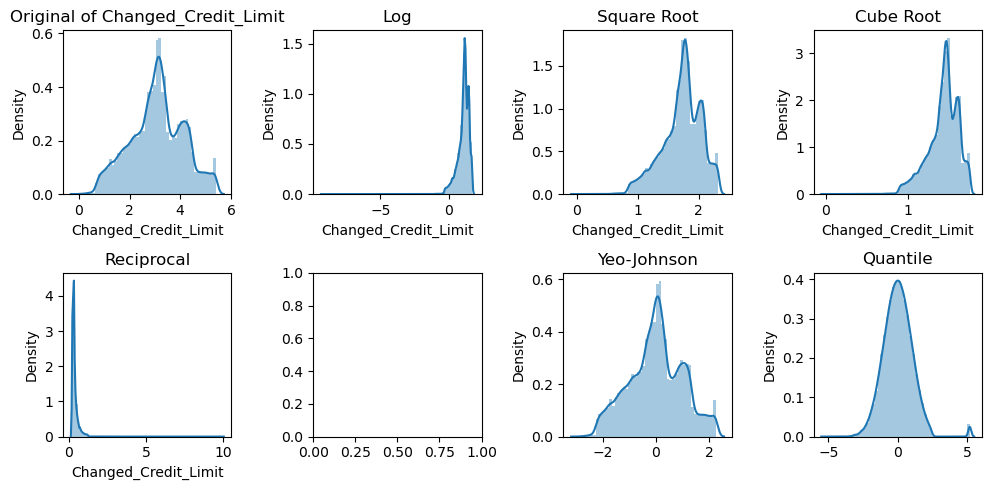

In [64]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Changed_Credit_Limit"],ax=axes[0,0]).set_title('Original of Changed_Credit_Limit')
sns.distplot(np.log(credit_df["Changed_Credit_Limit"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Changed_Credit_Limit"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Changed_Credit_Limit"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Changed_Credit_Limit"]+0.1),ax=axes[1,0]).set_title('Reciprocal')
#box_cox_dfz,_=stats.boxcox(credit_df["Changed_Credit_Limit"]+1)
#sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Changed_Credit_Limit"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Changed_Credit_Limit"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [25]:
credit_df["Changed_Credit_Limit"]=np.sqrt(credit_df["Changed_Credit_Limit"])

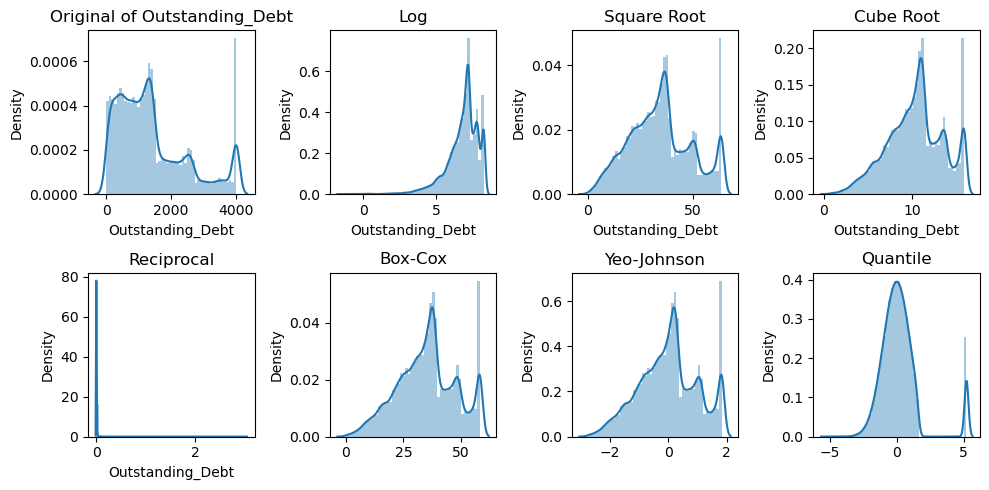

In [45]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Outstanding_Debt"],ax=axes[0,0]).set_title('Original of Outstanding_Debt')
sns.distplot(np.log(credit_df["Outstanding_Debt"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Outstanding_Debt"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Outstanding_Debt"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Outstanding_Debt"]+0.1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Outstanding_Debt"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Outstanding_Debt"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Outstanding_Debt"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [26]:
credit_df["Outstanding_Debt"]=np.sqrt(credit_df["Outstanding_Debt"])

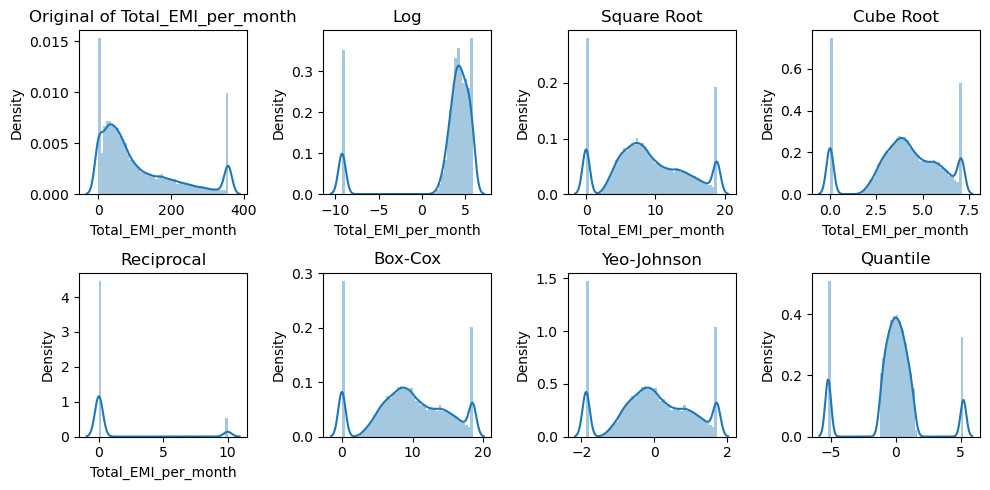

In [47]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Total_EMI_per_month"],ax=axes[0,0]).set_title('Original of Total_EMI_per_month')
sns.distplot(np.log(credit_df["Total_EMI_per_month"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Total_EMI_per_month"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Total_EMI_per_month"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Total_EMI_per_month"]+0.1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Total_EMI_per_month"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Total_EMI_per_month"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Total_EMI_per_month"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [27]:
credit_df["Total_EMI_per_month"]=np.sqrt(credit_df["Total_EMI_per_month"])

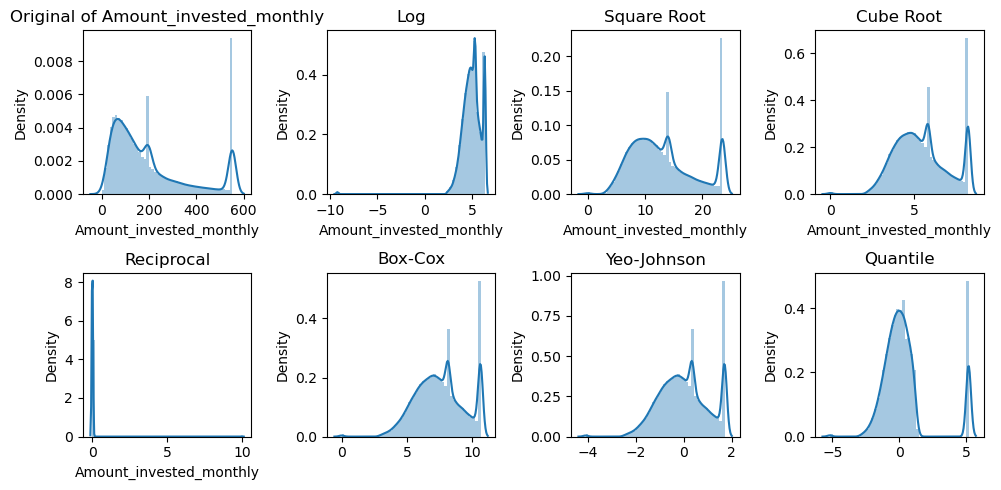

In [50]:
fig, axes = plt.subplots(2,4, figsize=(10, 5))
sns.distplot(credit_df["Amount_invested_monthly"],ax=axes[0,0]).set_title('Original of Amount_invested_monthly')
sns.distplot(np.log(credit_df["Amount_invested_monthly"]+0.0001),ax=axes[0,1]).set_title('Log')
sns.distplot(np.sqrt(credit_df["Amount_invested_monthly"]),ax=axes[0,2]).set_title('Square Root')
sns.distplot(np.cbrt(credit_df["Amount_invested_monthly"]),ax=axes[0,3]).set_title('Cube Root')
sns.distplot(1/(credit_df["Amount_invested_monthly"]+0.1),ax=axes[1,0]).set_title('Reciprocal')
box_cox_dfz,_=stats.boxcox(credit_df["Amount_invested_monthly"]+1)
sns.distplot(box_cox_dfz,ax=axes[1,1]).set_title('Box-Cox')
yoe_dfz=pt.fit_transform(credit_df[["Amount_invested_monthly"]])
sns.distplot(yoe_dfz,ax=axes[1,2]).set_title('Yeo-Johnson')
quantile_dfz=quantile.fit_transform(pd.DataFrame(credit_df["Amount_invested_monthly"]))
sns.distplot(quantile_dfz,ax=axes[1,3]).set_title('Quantile')
plt.tight_layout()
plt.show()

In [28]:
credit_df["Amount_invested_monthly"]=np.sqrt(credit_df["Amount_invested_monthly"])

### Encoding

In [132]:
credit_df.Customer_ID.unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [32]:
credit_df.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [36]:
credit_df.Credit_History_Age.unique()

array(['22 Years and 1 Months', '15 Years and 11 Months',
       '22 Years and 3 Months', '22 Years and 4 Months',
       '22 Years and 5 Months', '22 Years and 6 Months',
       '22 Years and 7 Months', '26 Years and 7 Months',
       '26 Years and 8 Months', '26 Years and 9 Months',
       '26 Years and 10 Months', '26 Years and 11 Months',
       '27 Years and 0 Months', '27 Years and 1 Months',
       '27 Years and 2 Months', '17 Years and 9 Months',
       '17 Years and 10 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '18 Years and 3 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '17 Years and 6 Months',
       '17 Years and 7 Months', '17 Years and 8 Months',
       '30 Years and 8 Months', '30 Years and 9 Months',
       '30 Years and 10 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 M

In [33]:
credit_df.Credit_Mix.unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [35]:
credit_df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [34]:
credit_df.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [46]:
credit_df.Payment_of_Min_Amount.value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

##### Label Encoding

In [29]:
le=LabelEncoder()
credit_df.Customer_ID=le.fit_transform(credit_df.Customer_ID)
credit_df.Type_of_Loan=le.fit_transform(credit_df.Type_of_Loan)
credit_df.Credit_History_Age=le.fit_transform(credit_df.Credit_History_Age)
credit_df.Occupation=le.fit_transform(credit_df.Occupation)

##### Ordinal Encoding

In [30]:
oe=OrdinalEncoder(categories=[['Bad','Standard', 'Good']])
credit_df["Credit_Mix"]=oe.fit_transform(credit_df[["Credit_Mix"]])
credit_df["Credit_Mix"].unique()

array([1., 2., 0.])

In [31]:
oe=OrdinalEncoder(categories=[['Poor','Standard','Good' ]])
credit_df["Credit_Score"]=oe.fit_transform(credit_df[["Credit_Score"]])
credit_df["Credit_Score"].unique()

array([2., 1., 0.])

In [32]:
oe=OrdinalEncoder(categories=[['High_spent_Large_value_payments','Low_spent_Large_value_payments',
                               'High_spent_Medium_value_payments','Low_spent_Medium_value_payments',
                               'High_spent_Small_value_payments','Low_spent_Small_value_payments']])
credit_df["Payment_Behaviour"]=oe.fit_transform(credit_df[["Payment_Behaviour"]])
credit_df["Payment_Behaviour"].unique()

array([4., 1., 3., 5., 2., 0.])

In [33]:
ohe = OneHotEncoder(sparse=False, drop=None)
encoded_data = ohe.fit_transform(credit_df[['Payment_of_Min_Amount']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Payment_of_Min_Amount']))

# Concatenate the original DataFrame with the encoded DataFrame
#credit_df = pd.concat([credit_df, encoded_df], axis=1)
encoded_df.head()

Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
0                       0.0                       1.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       1.0   

   Payment_of_Min_Amount_Yes  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

In [34]:
credit_df = pd.concat([credit_df, encoded_df], axis=1)
credit_df.drop(['Payment_of_Min_Amount'],axis=1,inplace=True)
credit_df.head()

Customer_ID  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0        12320          12       9.858183              17.083971   
1        12320          12       9.858183              20.972155   
2        12320          12       9.858183              20.972155   
3        12320          12       9.858183              20.972155   
4        12320          12       9.858183              17.083971   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.0              4.0        1.43836          4.0   
1                3.0              4.0        1.43836          4.0   
2                3.0              4.0        1.43836          4.0   
3                3.0              4.0        1.43836          4.0   
4                3.0              4.0        1.43836          4.0   

   Type_of_Loan  Delay_from_due_date  ...  Credit_Utilization_Ratio  \
0           128             1.732051  ...                 26.822620   
1           128                  NaN  ...                 31.944960   
2           128             1.732051  ...                 28.609352   
3           128             2.236068  ...                 31.377862   
4           128             2.449490  ...                 24.797347   

   Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
0                 180             7.040948                 8.967458   
1                  86             7.040948                10.875671   
2                 184             7.040948                 9.038779   
3                 185             7.040948                14.122963   
4                 186             7.040948                 6.435849   

   Payment_Behaviour  Monthly_Balance  Credit_Score  Payment_of_Min_Amount_NM  \
0                4.0       312.494089           2.0                       0.0   
1                1.0       284.629162           2.0                       0.0   
2                3.0       331.209863           2.0                       0.0   
3                5.0       223.451310           2.0                       0.0   
4                2.0       341.489231           2.0                       0.0   

   Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  
0                       1.0                        0.0  
1                       1.0                        0.0  
2                       1.0                        0.0  
3                       1.0                        0.0  
4                       1.0                        0.0  

[5 rows x 25 columns]

### Data Imbalance Handling

In [51]:
credit_df.Customer_ID.unique()

array([12320,  1066,  1885, ..., 10674,  7857,  8833])

In [35]:
X=credit_df.drop(['Credit_Score'],axis=1)
y=credit_df.Credit_Score
X.columns,y.head()

(Index(['Customer_ID', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
        'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
        'Monthly_Balance', 'Payment_of_Min_Amount_NM',
        'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
       dtype='object'),
 0    2.0
 1    2.0
 2    2.0
 3    2.0
 4    2.0
 Name: Credit_Score, dtype: float64)

In [76]:
X

Customer_ID  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0            12320          12       9.858183              17.083971   
1            12320          12       9.858183              20.972155   
2            12320          12       9.858183              20.972155   
3            12320          12       9.858183              20.972155   
4            12320          12       9.858183              17.083971   
...            ...         ...            ...                    ...   
99995         8833           9      10.587316              19.896296   
99996         8833           9      10.587316              19.896296   
99997         8833           9      10.587316              19.896296   
99998         8833           9      10.587316              19.896296   
99999         8833           9      10.587316              19.896296   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0       1.438360          4.0   
1                    3.0              4.0       1.438360          4.0   
2                    3.0              4.0       1.438360          4.0   
3                    3.0              4.0       1.438360          4.0   
4                    3.0              4.0       1.438360          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0       3.183566          2.0   
99996                4.0              6.0       3.183566          2.0   
99997                4.0              6.0       9.639539          2.0   
99998                4.0              6.0       3.183566          2.0   
99999                4.0              6.0       3.183566          2.0   

       Type_of_Loan  Delay_from_due_date  ...  Outstanding_Debt  \
0               128             1.732051  ...         28.460148   
1               128             4.293694  ...         28.460148   
2               128             1.732051  ...         28.460148   
3               128             2.236068  ...         28.460148   
4               128             2.449490  ...         28.460148   
...             ...                  ...  ...               ...   
99995           683             4.795832  ...         22.413835   
99996           683             4.242641  ...         22.413835   
99997           683             5.196152  ...         22.413835   
99998           683             4.472136  ...         22.413835   
99999           683             4.242641  ...         22.413835   

       Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                     26.822620                 180             7.040948   
1                     31.944960                  86             7.040948   
2                     28.609352                 184             7.040948   
3                     31.377862                 185             7.040948   
4                     24.797347                 186             7.040948   
...                         ...                 ...                  ...   
99995                 34.663572                 307             5.924865   
99996                 40.565631                 308             5.924865   
99997                 41.255522                 309             5.924865   
99998                 33.638208                 310             5.924865   
99999                 34.192463                 301             5.924865   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                     8.967458                4.0       312.494089   
1                    10.875671                1.0       284.629162   
2                     9.038779                3.0       331.209863   
3                    14.122963                5.0       223.451310   
4                     6.435849                2.0       341.489231   
...                        ...                ...              ...   
99995                 7.808414                0.0       3

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  int32  
 1   Occupation                 100000 non-null  int32  
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  float64
 5   Num_Credit_Card            100000 non-null  float64
 6   Interest_Rate              100000 non-null  float64
 7   Num_of_Loan                100000 non-null  float64
 8   Type_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date        99409 non-null   float64
 10  Num_of_Delayed_Payment     100000 non-null  float64
 11  Changed_Credit_Limit       98414 non-null   float64
 12  Num_Credit_Inquiries       100000 non-null  float64
 13  Credit_Mix                 100

In [77]:
credit_df.Monthly_Balance.unique()

array([312.49408868, 284.6291625 , 331.20986285, ..., 448.42640653,
       343.7939996 , 214.61493362])

In [78]:
categorical_feature_indices = [0,1,4,5,6,7,8,9,13,15,16,19,21,22,23]
categorical_feature_indices

[0, 1, 4, 5, 6, 7, 8, 9, 13, 15, 16, 19, 21, 22, 23]

In [74]:
X['Delay_from_due_date'].isna().mean()*100

0.5910000000000001

In [36]:
X["Delay_from_due_date"]=knn_imputer.fit_transform(credit_df[["Delay_from_due_date"]])
X["Changed_Credit_Limit"]=knn_imputer.fit_transform(credit_df[["Changed_Credit_Limit"]])

##### SMOTE Method

In [37]:
#categorical_feature_indices = list(range(len(X.columns), X.shape[1]))
#categorical_columns = X.select_dtypes(include=['object']).columns
#categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object']).columns]
#X[categorical_columns] = X[categorical_columns].astype('category')
#categorical_features = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object']).columns]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##### Used SMOTE because it generates new samples by interpolation by knn method and avoids data loss

In [144]:
X_resampled

Customer_ID  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0             12320          12       9.858183              17.083971   
1             12320          12       9.858183              20.972155   
2             12320          12       9.858183              20.972155   
3             12320          12       9.858183              20.972155   
4             12320          12       9.858183              17.083971   
...             ...         ...            ...                    ...   
159517        11515           1      11.287509              20.355959   
159518         3364          12      11.274032              23.283159   
159519         4340          11      10.585402              19.967147   
159520         5575           9      10.579060              19.596494   
159521          477           9      11.266830              23.406061   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.000000         4.000000       1.438360     4.000000   
1                3.000000         4.000000       1.438360     4.000000   
2                3.000000         4.000000       1.438360     4.000000   
3                3.000000         4.000000       1.438360     4.000000   
4                3.000000         4.000000       1.438360     4.000000   
...                   ...              ...            ...          ...   
159517           4.318884         2.727554       1.090939     3.000000   
159518           0.000000         5.000000       2.406399     2.000000   
159519           3.671189         4.223730       4.153373     3.000000   
159520           2.984614         2.969227       1.416229     0.000000   
159521           2.009764         5.747559       1.553287     1.747559   

        Type_of_Loan  Delay_from_due_date  ...  Outstanding_Debt  \
0                128             1.732051  ...         28.460148   
1                128             4.293694  ...         28.460148   
2                128             1.732051  ...         28.460148   
3                128             2.236068  ...         28.460148   
4                128             2.449490  ...         28.460148   
...              ...                  ...  ...               ...   
159517          1070             3.464102  ...         15.951414   
159518          4135             3.162278  ...         28.416896   
159519          3844             2.767968  ...         23.767792   
159520          3463             2.012746  ...         32.472665   
159521          5590             2.059593  ...         27.894625   

        Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                      26.822620                 180             7.040948   
1                      31.944960                  86             7.040948   
2                      28.609352                 184             7.040948   
3                      31.377862                 185             7.040948   
4                      24.797347                 186             7.040948   
...                          ...                 ...                  ...   
159517                 34.386591                 310            13.083337   
159518                 32.782463                 149            11.382183   
159519                 36.493548                 260            13.099386   
159520                 25.276789                 222             0.000000   
159521                 34.144692                 185            10.453599   

        Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                      8.967458           4.000000       312.494089   
1                     10.875671           1.000000       284.629162   
2                      9.038779           3.000000       331.209863   
3                     14.122963           5.000000       223.451310   
4                      6.435849           2.000000       341.489231   
...                         ...                ...              ...   
159

# Feature Selection

In [38]:
def selector(func,X,y):
    selector = SelectKBest(score_func=func, k=20)
    X_resampled_selected = selector.fit_transform(X, y)
    selected_features_mask = selector.get_support()
    
    # Get the names of the selected features
    selected_feature_names = X.columns[selected_features_mask]
    
    # Convert the selected features to a DataFrame
    X_resampled_selected_df = pd.DataFrame(X_resampled_selected, columns=selected_feature_names)
    
    return X_resampled_selected_df

### Feature Selection using F Classifier (f_classif)

In [193]:
X_resampled_kbest_f_classif=selector(f_classif,X_resampled,y_resampled)
X_resampled_kbest_f_classif

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0            9.858183              17.083971           3.000000   
1            9.858183              20.972155           3.000000   
2            9.858183              20.972155           3.000000   
3            9.858183              20.972155           3.000000   
4            9.858183              17.083971           3.000000   
...               ...                    ...                ...   
159517      11.287509              20.355959           4.318884   
159518      11.274032              23.283159           0.000000   
159519      10.585402              19.967147           3.671189   
159520      10.579060              19.596494           2.984614   
159521      11.266830              23.406061           2.009764   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.000000       1.438360     4.000000             1.732051   
1              4.000000       1.438360     4.000000             4.293694   
2              4.000000       1.438360     4.000000             1.732051   
3              4.000000       1.438360     4.000000             2.236068   
4              4.000000       1.438360     4.000000             2.449490   
...                 ...            ...          ...                  ...   
159517         2.727554       1.090939     3.000000             3.464102   
159518         5.000000       2.406399     2.000000             3.162278   
159519         4.223730       4.153373     3.000000             2.767968   
159520         2.969227       1.416229     0.000000             2.012746   
159521         5.747559       1.553287     1.747559             2.059593   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.000000              3.357082              4.000000   
1                    13.458332              3.357082              4.000000   
2                     7.000000              3.221700              4.000000   
3                     4.000000              2.503997              4.000000   
4                    13.458332              3.357082              4.000000   
...                        ...                   ...                   ...   
159517                6.272446              2.789472              1.272446   
159518                5.000000              1.081665              4.000000   
159519               11.894919              2.594829              5.542270   
159520                5.923068              3.062687              2.984614   
159521               11.019528              1.800955              4.990236   

        Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0          1.00000         28.460148                 26.822620   
1          2.00000         28.460148                 31.944960   
2          2.00000         28.460148                 28.609352   
3          2.00000         28.460148                 31.377862   
4          2.00000         28.460148                 24.797347   
...            ...               ...                       ...   
159517     2.00000         15.951414                 34.386591   
159518     2.00000         28.416896                 32.782463   
159519     1.22373         23.767792                 36.493548   
159520     2.00000         32.472665                 25.276789   
159521     1.00000         27.894625                 34.144692   

        Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
0                    180.0             7.040948                 8.967458   
1                     86.0             7.040948                10.875671   
2                    184.0             7.040948                 9.038779   
3                    185.0             7.040948                14.122963   
4                    186.0             7.040948                 6.435849   
...                    ...                  ...                      ...   
159517               310.0  

### Feature Selection using Mutual Information Classifier (mutual_info_classif)

In [218]:
X_resampled_kbest_mic=selector(mutual_info_classif,X_resampled,y_resampled)
X_resampled_kbest_mic

Customer_ID  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           12320.0       9.858183              17.083971           3.000000   
1           12320.0       9.858183              20.972155           3.000000   
2           12320.0       9.858183              20.972155           3.000000   
3           12320.0       9.858183              20.972155           3.000000   
4           12320.0       9.858183              17.083971           3.000000   
...             ...            ...                    ...                ...   
159517      11515.0      11.287509              20.355959           4.318884   
159518       3364.0      11.274032              23.283159           0.000000   
159519       4340.0      10.585402              19.967147           3.671189   
159520       5575.0      10.579060              19.596494           2.984614   
159521        477.0      11.266830              23.406061           2.009764   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Type_of_Loan  \
0              4.000000       1.438360     4.000000         128.0   
1              4.000000       1.438360     4.000000         128.0   
2              4.000000       1.438360     4.000000         128.0   
3              4.000000       1.438360     4.000000         128.0   
4              4.000000       1.438360     4.000000         128.0   
...                 ...            ...          ...           ...   
159517         2.727554       1.090939     3.000000        1070.0   
159518         5.000000       2.406399     2.000000        4135.0   
159519         4.223730       4.153373     3.000000        3844.0   
159520         2.969227       1.416229     0.000000        3463.0   
159521         5.747559       1.553287     1.747559        5590.0   

        Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                  1.732051                7.000000              3.357082   
1                  4.293694               13.458332              3.357082   
2                  1.732051                7.000000              3.221700   
3                  2.236068                4.000000              2.503997   
4                  2.449490               13.458332              3.357082   
...                     ...                     ...                   ...   
159517             3.464102                6.272446              2.789472   
159518             3.162278                5.000000              1.081665   
159519             2.767968               11.894919              2.594829   
159520             2.012746                5.923068              3.062687   
159521             2.059593               11.019528              1.800955   

        Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                   4.000000     1.00000         28.460148   
1                   4.000000     2.00000         28.460148   
2                   4.000000     2.00000         28.460148   
3                   4.000000     2.00000         28.460148   
4                   4.000000     2.00000         28.460148   
...                      ...         ...               ...   
159517              1.272446     2.00000         15.951414   
159518              4.000000     2.00000         28.416896   
159519              5.542270     1.22373         23.767792   
159520              2.984614     2.00000         32.472665   
159521              4.990236     1.00000         27.894625   

        Credit_History_Age  Total_EMI_per_month  Payment_Behaviour  \
0                    180.0             7.040948           4.000000   
1                     86.0             7.040948           1.000000   
2                    184.0             7.040948           3.000000   
3                    185.0             7.040948           5.000000   
4                    186.0             7.040948           2.000000   
...                    ...                  ...                ...   
159517               310.0            13.083337           

### Feature Selection using Variance Threshold (VarianceThreshold)

In [44]:
selector_vt = VarianceThreshold(threshold=0.5)  # Example threshold
X_resampled_kbest_vt = selector_vt.fit_transform(X_resampled)
X_resampled_kbest_vt

array([[1.23200000e+04, 1.20000000e+01, 9.85818261e+00, ...,
        8.96745758e+00, 4.00000000e+00, 3.12494089e+02],
       [1.23200000e+04, 1.20000000e+01, 9.85818261e+00, ...,
        1.08756711e+01, 1.00000000e+00, 2.84629162e+02],
       [1.23200000e+04, 1.20000000e+01, 9.85818261e+00, ...,
        9.03877875e+00, 3.00000000e+00, 3.31209863e+02],
       ...,
       [4.34000000e+03, 1.10000000e+01, 1.05854022e+01, ...,
        1.30046757e+01, 4.55254040e+00, 3.75570579e+02],
       [5.57500000e+03, 9.00000000e+00, 1.05790600e+01, ...,
        1.94237188e+01, 5.00000000e+00, 2.29206436e+02],
       [4.77000000e+02, 9.00000000e+00, 1.12668296e+01, ...,
        1.89736781e+01, 3.73779494e+00, 4.07615399e+02]])

In [45]:
selected_features_mask_vt = selector_vt.get_support()
selected_features_vt = X_resampled.columns[selected_features_mask_vt]
X_resampled_vt_df_1 = pd.DataFrame(X_resampled[selected_features_vt])
X_resampled_vt_df_1

Customer_ID  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0             12320          12       9.858183              17.083971   
1             12320          12       9.858183              20.972155   
2             12320          12       9.858183              20.972155   
3             12320          12       9.858183              20.972155   
4             12320          12       9.858183              17.083971   
...             ...         ...            ...                    ...   
159517        11515           1      11.287509              20.355959   
159518         3364          12      11.274032              23.283159   
159519         4340          11      10.585402              19.967147   
159520         5575           9      10.579060              19.596494   
159521          477           9      11.266830              23.406061   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                3.000000         4.000000       1.438360     4.000000   
1                3.000000         4.000000       1.438360     4.000000   
2                3.000000         4.000000       1.438360     4.000000   
3                3.000000         4.000000       1.438360     4.000000   
4                3.000000         4.000000       1.438360     4.000000   
...                   ...              ...            ...          ...   
159517           4.318884         2.727554       1.090939     3.000000   
159518           0.000000         5.000000       2.406399     2.000000   
159519           3.671189         4.223730       4.153373     3.000000   
159520           2.984614         2.969227       1.416229     0.000000   
159521           2.009764         5.747559       1.553287     1.747559   

        Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0                128             1.732051                7.000000   
1                128             4.293694               13.458332   
2                128             1.732051                7.000000   
3                128             2.236068                4.000000   
4                128             2.449490               13.458332   
...              ...                  ...                     ...   
159517          1070             3.464102                6.272446   
159518          4135             3.162278                5.000000   
159519          3844             2.767968               11.894919   
159520          3463             2.012746                5.923068   
159521          5590             2.059593               11.019528   

        Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
0                   3.357082              4.000000         28.460148   
1                   3.357082              4.000000         28.460148   
2                   3.221700              4.000000         28.460148   
3                   2.503997              4.000000         28.460148   
4                   3.357082              4.000000         28.460148   
...                      ...                   ...               ...   
159517              2.789472              1.272446         15.951414   
159518              1.081665              4.000000         28.416896   
159519              2.594829              5.542270         23.767792   
159520              3.062687              2.984614         32.472665   
159521              1.800955              4.990236         27.894625   

        Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                      26.822620                 180             7.040948   
1                      31.944960                  86             7.040948   
2                      28.609352                 184             7.040948   
3                      31.377862                 185             7.040948   
4                      24.797347                 186             7.040948   
...                          ...                 ...                  ...   
159517   

### Feature Selection using Recursive Feature Elimination (RFE)

In [191]:
model = RandomForestClassifier(random_state=42)
selector = RFE(model, n_features_to_select=15)
selector.fit_transform(X_resampled, y_resampled)

KeyboardInterrupt: 

In [94]:
selector.ranking_

array([ 1,  9,  1,  6,  4,  1,  1,  7,  5,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  8,  1, 10,  1,  3])

In [129]:
selected_features_mask = selector.support_
selected_features = X_resampled.columns[selected_features_mask]
X_resampled_rfe_df_1 = pd.DataFrame(X_resampled[selected_features])
X_resampled_rfe_df_1

Customer_ID  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0             12320       9.858183              17.083971           3.000000   
1             12320       9.858183              20.972155           3.000000   
2             12320       9.858183              20.972155           3.000000   
3             12320       9.858183              20.972155           3.000000   
4             12320       9.858183              17.083971           3.000000   
...             ...            ...                    ...                ...   
159517        11515      11.287509              20.355959           4.318884   
159518         3364      11.274032              23.283159           0.000000   
159519         4340      10.585402              19.967147           3.671189   
159520         5575      10.579060              19.596494           2.984614   
159521          477      11.266830              23.406061           2.009764   

        Num_Credit_Card  Interest_Rate  Type_of_Loan  Delay_from_due_date  \
0              4.000000       1.438360           128             1.732051   
1              4.000000       1.438360           128             4.293694   
2              4.000000       1.438360           128             1.732051   
3              4.000000       1.438360           128             2.236068   
4              4.000000       1.438360           128             2.449490   
...                 ...            ...           ...                  ...   
159517         2.727554       1.090939          1070             3.464102   
159518         5.000000       2.406399          4135             3.162278   
159519         4.223730       4.153373          3844             2.767968   
159520         2.969227       1.416229          3463             2.012746   
159521         5.747559       1.553287          5590             2.059593   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.000000              3.357082              4.000000   
1                    13.458332              3.357082              4.000000   
2                     7.000000              3.221700              4.000000   
3                     4.000000              2.503997              4.000000   
4                    13.458332              3.357082              4.000000   
...                        ...                   ...                   ...   
159517                6.272446              2.789472              1.272446   
159518                5.000000              1.081665              4.000000   
159519               11.894919              2.594829              5.542270   
159520                5.923068              3.062687              2.984614   
159521               11.019528              1.800955              4.990236   

        Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0          1.00000         28.460148                 26.822620   
1          2.00000         28.460148                 31.944960   
2          2.00000         28.460148                 28.609352   
3          2.00000         28.460148                 31.377862   
4          2.00000         28.460148                 24.797347   
...            ...               ...                       ...   
159517     2.00000         15.951414                 34.386591   
159518     2.00000         28.416896                 32.782463   
159519     1.22373         23.767792                 36.493548   
159520     2.00000         32.472665                 25.276789   
159521     1.00000         27.894625                 34.144692   

        Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
0                      180             7.040948                 8.967458   
1                       86             7.040948                10.875671   
2                      184             7.040948                 9.038779   
3                      185             7.040948                14.122963   
4           

# Splitting

### Splitting for Features Selected using F Classifier (f_classif)

In [194]:
X_train_f_classif,X_test_f_classif,y_train_f_classif,y_test_f_classif=train_test_split(X_resampled_kbest_f_classif,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Mutual Information Classifier (mutual_info_classif)

In [219]:
X_train_mic,X_test_mic,y_train_mic,y_test_mic=train_test_split(X_resampled_kbest_mic,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Variance Threshold (VarianceThreshold)

In [46]:
X_train_vt,X_test_vt,y_train_vt,y_test_vt=train_test_split(X_resampled_vt_df_1,y_resampled,random_state=42,test_size=0.2)

### Splitting for Features Selected using Recursive Feature Elimination (RFE)

In [130]:
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe=train_test_split(X_resampled_rfe_df_1,y_resampled,random_state=42,test_size=0.2)

# Scaling

In [47]:
minmax=MinMaxScaler()

### Scaling for Features Selected using F Classifier (f_classif)

In [196]:
X_train_f_classif_scale=minmax.fit_transform(X_train_f_classif)
X_test_f_classif_scale=minmax.transform(X_test_f_classif)
X_train_f_classif_scale

array([[0.82907123, 0.8165354 , 0.35714286, ..., 0.48056855, 1.        ,
        0.        ],
       [0.68571824, 0.66087372, 0.28571429, ..., 0.33104766, 0.        ,
        0.        ],
       [0.44974812, 0.43041092, 0.42857143, ..., 0.46467996, 1.        ,
        0.        ],
       ...,
       [0.93174042, 0.91723466, 0.42857143, ..., 1.        , 0.33302174,
        0.        ],
       [0.55322957, 0.56406486, 0.07142857, ..., 0.27558008, 1.        ,
        0.        ],
       [0.77596263, 0.7637152 , 0.5       , ..., 0.72534448, 0.        ,
        1.        ]])

### Scaling for Features Selected using Mutual Information Classifier (mutual_info_classif)

In [221]:
X_train_mic_scale=minmax.fit_transform(X_train_mic)
X_test_mic_scale=minmax.transform(X_test_mic)
X_train_mic_scale

array([[0.56028482, 0.82907123, 0.8165354 , ..., 0.48056855, 1.        ,
        0.        ],
       [0.80462437, 0.68571824, 0.66087372, ..., 0.33104766, 0.        ,
        0.        ],
       [0.15825266, 0.44974812, 0.43041092, ..., 0.46467996, 1.        ,
        0.        ],
       ...,
       [0.65405232, 0.93174042, 0.91723466, ..., 1.        , 0.33302174,
        0.        ],
       [0.10056805, 0.55322957, 0.56406486, ..., 0.27558008, 1.        ,
        0.        ],
       [0.80590447, 0.77596263, 0.7637152 , ..., 0.72534448, 0.        ,
        1.        ]])

### Scaling for Features Selected using Variance Threshold (VarianceThreshold)

In [49]:
X_train_vt_scale=minmax.fit_transform(X_train_vt)
X_test_vt_scale=minmax.transform(X_test_vt)
X_train_vt_scale

array([[0.56028482, 0.5       , 0.82907123, ..., 1.        , 0.2       ,
        0.48056855],
       [0.80462437, 0.57142857, 0.68571824, ..., 0.85935295, 0.2       ,
        0.33104766],
       [0.15825266, 1.        , 0.44974812, ..., 1.        , 1.        ,
        0.46467996],
       ...,
       [0.65405232, 0.78571429, 0.93174042, ..., 0.58548919, 0.33302174,
        1.        ],
       [0.10056805, 0.64285714, 0.55322957, ..., 0.79772832, 1.        ,
        0.27558008],
       [0.80590447, 0.42857143, 0.77596263, ..., 0.69401175, 0.78188575,
        0.72534448]])

### Scaling for Features Selected using Recursive Feature Elimination (RFE)

In [132]:
X_train_rfe_scale=minmax.fit_transform(X_train_rfe)
X_test_rfe_scale=minmax.transform(X_test_rfe)
X_train_rfe_scale

array([[0.56028482, 0.82907123, 0.8165354 , ..., 0.48056855, 1.        ,
        0.        ],
       [0.80462437, 0.68571824, 0.66087372, ..., 0.33104766, 0.        ,
        0.        ],
       [0.15825266, 0.44974812, 0.43041092, ..., 0.46467996, 1.        ,
        0.        ],
       ...,
       [0.65405232, 0.93174042, 0.91723466, ..., 1.        , 0.33302174,
        0.        ],
       [0.10056805, 0.55322957, 0.56406486, ..., 0.27558008, 1.        ,
        0.        ],
       [0.80590447, 0.77596263, 0.7637152 , ..., 0.72534448, 0.        ,
        1.        ]])

# Model Training and Evaluation

### Logistic Regression

In [50]:
lr=LogisticRegression()

##### f_classifier

In [198]:
lr.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_lr=lr.predict(X_test_f_classif_scale)
y_test_pred_lr

array([1., 2., 2., ..., 2., 0., 1.])

In [199]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_lr))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_lr)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_lr))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_lr))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_lr,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_lr,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_lr,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_lr))

Mean squared error:  0.4949694405265632
Root mean squared error:  0.7035406459662179
Accuracy for test set:  0.6862247296661965
Precision for test set:  0.6862247296661965
Recall for test set:  0.6862247296661965
F1 score for test set:  0.6862247296661965
Confusion matrix:  [[7521 1612 1582]
 [2548 5712 2357]
 [ 345 1567 8661]]


In [59]:
y_train_pred_lr=lr.predict(X_train_f_classif_scale)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_lr))

Accuracy for train set:  0.6843759060313281


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [223]:
lr.fit(X_train_mic_scale,y_train_mic)
y_test_pred_lr_2=lr.predict(X_test_mic_scale)
y_test_pred_lr_2

array([1., 2., 2., ..., 2., 0., 1.])

In [224]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_lr_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_lr_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_lr_2))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_lr_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_lr_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_lr_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_lr_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_lr_2))

Mean squared error:  0.49628584861307007
Root mean squared error:  0.7044755841142191
Accuracy for test set:  0.6861307005171603
Precision for test set:  0.6861307005171603
Recall for test set:  0.6861307005171603
F1 score for test set:  0.6861307005171603
Confusion matrix:  [[7532 1594 1589]
 [2553 5710 2354]
 [ 351 1573 8649]]


In [172]:
y_train_pred_lr_2=lr.predict(X_train_mic_scale)
#train_error_lr_2 = mean_squared_error(y_train_mic, y_train_pred_lr_2)
#test_error_lr_2 = mean_squared_error(y_test_mic, y_test_pred_lr_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_lr_2))

Accuracy for train set:  0.6843759060313281


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [51]:
lr.fit(X_train_vt_scale,y_train_vt)
y_test_pred_lr_3=lr.predict(X_test_vt_scale)
y_test_pred_lr_3

array([1., 2., 2., ..., 2., 0., 1.])

In [52]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_lr_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_lr_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_lr_3))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_lr_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_lr_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_lr_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_lr_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_lr_3))

Mean squared error:  0.5156245102648488
Root mean squared error:  0.718069989809384
Accuracy for test set:  0.6558846575771823
Precision for test set:  0.6558846575771823
Recall for test set:  0.6558846575771823
F1 score for test set:  0.6558846575771823
Confusion matrix:  [[7592 1662 1461]
 [2656 5220 2741]
 [ 363 2096 8114]]


In [53]:
y_train_pred_lr_3=lr.predict(X_train_vt_scale)
#train_error_lr_3 = mean_squared_error(y_train_vt, y_train_pred_lr_3)
#test_error_lr_3 = mean_squared_error(y_test_vt, y_test_pred_lr_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_lr_3))

Accuracy for train set:  0.6564172484857033


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [134]:
lr.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_lr_4=lr.predict(X_test_rfe_scale)
y_test_pred_lr_4

array([1., 2., 2., ..., 2., 0., 1.])

In [135]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_lr_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_lr_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_lr_4))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_lr_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_lr_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_lr_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_lr_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_lr_4))

Mean squared error:  0.4989186647860837
Root mean squared error:  0.706341747871442
Accuracy for test set:  0.6866948754113775
Precision for test set:  0.6866948754113775
Recall for test set:  0.6866948754113775
F1 score for test set:  0.6866948754113775
Confusion matrix:  [[7531 1566 1618]
 [2528 5735 2354]
 [ 356 1574 8643]]


In [136]:
y_train_pred_lr_4=lr.predict(X_train_rfe_scale)
#train_error_lr_4 = mean_squared_error(y_train_rfe, y_train_pred_lr_4)
#test_error_lr_4 = mean_squared_error(y_test_rfe, y_test_pred_lr_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_lr_4))

Accuracy for train set:  0.6846031484833526


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Decision Tree Classifier

In [54]:
dtc=DecisionTreeClassifier()

##### f_classifier

In [226]:
dtc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_dtc_1=dtc.predict(X_test_f_classif_scale)
y_test_pred_dtc_1

array([1., 2., 1., ..., 2., 0., 2.])

In [227]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_dtc_1))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_dtc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_dtc_1))

Mean squared error:  0.4001880582980724
Root mean squared error:  0.6326041877019725
Accuracy for test set:  0.7456511518570756
Precision for test set:  0.7456511518570756
Recall for test set:  0.7456511518570756
F1 score for test set:  0.7456511518570755
Confusion matrix:  [[8076 1861  778]
 [1876 7275 1466]
 [ 773 1361 8439]]


In [228]:
y_train_pred_dtc_1=dtc.predict(X_train_f_classif_scale)
#train_error_dtc_1 = mean_squared_error(y_train_f_classif, y_train_pred_dtc_1)
#test_error_dtc_1 = mean_squared_error(y_test_f_classif, y_test_pred_dtc_1)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_dtc_1))

Accuracy for train set:  1.0


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### mutual_info_classifier

In [229]:
dtc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_dtc_2=dtc.predict(X_test_mic_scale)
y_test_pred_dtc_2

array([0., 1., 1., ..., 2., 0., 1.])

In [230]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_dtc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_dtc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_dtc_2))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_dtc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_dtc_2))

Mean squared error:  0.36947186961291334
Root mean squared error:  0.6078419775014829
Accuracy for test set:  0.7640495220184924
Precision for test set:  0.7640495220184924
Recall for test set:  0.7640495220184924
F1 score for test set:  0.7640495220184924
Confusion matrix:  [[8292 1707  716]
 [1776 7473 1368]
 [ 704 1257 8612]]


In [231]:
y_train_pred_dtc_2=dtc.predict(X_train_mic_scale)
#train_error_dtc_2 = mean_squared_error(y_train_mic, y_train_pred_dtc_2)
#test_error_dtc_2 = mean_squared_error(y_test_mic, y_test_pred_dtc_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_dtc_2))

Accuracy for train set:  0.9999921640533784


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Variance Threshold

In [55]:
dtc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_dtc_3=dtc.predict(X_test_vt_scale)
y_test_pred_dtc_3

array([1., 0., 2., ..., 2., 0., 1.])

In [56]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_dtc_3))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_dtc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_dtc_3))

Mean squared error:  0.39705375333019904
Root mean squared error:  0.6301220146370059
Accuracy for test set:  0.7406989500078358
Precision for test set:  0.7406989500078358
Recall for test set:  0.7406989500078358
F1 score for test set:  0.7406989500078359
Confusion matrix:  [[8125 1838  752]
 [1848 7109 1660]
 [ 713 1462 8398]]


In [57]:
y_train_pred_dtc_3=dtc.predict(X_train_vt_scale)
#train_error_dtc_3 = mean_squared_error(y_train_vt, y_train_pred_dtc_3)
#test_error_dtc_3 = mean_squared_error(y_test_vt, y_test_pred_dtc_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_dtc_3))

Accuracy for train set:  1.0


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Recursive Feature Elimination

In [174]:
dtc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_dtc_4=dtc.predict(X_test_rfe_scale)
y_test_pred_dtc_4

array([1., 2., 0., ..., 2., 0., 1.])

In [139]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_dtc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_dtc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_dtc_4))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_dtc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_dtc_4))

Mean squared error:  0.3256856292117223
Root mean squared error:  0.5706887323328912
Accuracy for test set:  0.7825419213289453
Precision for test set:  0.7825419213289453
Recall for test set:  0.7825419213289453
F1 score for test set:  0.7825419213289453
Confusion matrix:  [[8509 1630  576]
 [1700 7622 1295]
 [ 575 1162 8836]]


In [140]:
y_train_pred_dtc_4=dtc.predict(X_train_rfe_scale)
#train_error_dtc_4 = mean_squared_error(y_train_rfe, y_train_pred_dtc_4)
#test_error_dtc_4 = mean_squared_error(y_test_rfe, y_test_pred_dtc_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_dtc_4))

Accuracy for train set:  1.0


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

### Random Forest Classifier

In [58]:
rfc=RandomForestClassifier()

##### f_classifier

In [205]:
rfc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_rfc_1=rfc.predict(X_test_f_classif_scale)
y_test_pred_rfc_1

array([1., 2., 1., ..., 2., 0., 1.])

In [206]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_rfc_1))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_rfc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_rfc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_rfc_1))

Mean squared error:  0.2424384892650055
Root mean squared error:  0.4923804314399644
Accuracy for test set:  0.8376743457138379
Precision for test set:  0.8376743457138379
Recall for test set:  0.8376743457138379
F1 score for test set:  0.8376743457138379
Confusion matrix:  [[9105  859  751]
 [1417 7941 1259]
 [ 101  792 9680]]


In [178]:
y_train_pred_rfc_1=rfc.predict(X_train_f_classif_scale)
#train_error_rfc_1 = mean_squared_error(y_train_f_classif, y_train_pred_rfc_1)
#test_error_rfc_1 = mean_squared_error(y_test_f_classif, y_test_pred_rfc_1)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_rfc_1))

Accuracy for train set:  0.9992399131777114


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### mutual_info_classifier

In [233]:
rfc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_rfc_2=rfc.predict(X_test_mic_scale)
y_test_pred_rfc_2

array([1., 2., 2., ..., 2., 0., 1.])

In [234]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_rfc_2))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_rfc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_rfc_2))

Mean squared error:  0.21228647547406362
Root mean squared error:  0.46074556479044226
Accuracy for test set:  0.851559316721517
Precision for test set:  0.851559316721517
Recall for test set:  0.851559316721517
F1 score for test set:  0.851559316721517
Confusion matrix:  [[9270  846  599]
 [1366 8145 1106]
 [  80  739 9754]]


In [235]:
y_train_pred_rfc_2=rfc.predict(X_train_mic_scale)
#train_error_rfc_2 = mean_squared_error(y_train_mic, y_train_pred_rfc_2)
#test_error_rfc_2 = mean_squared_error(y_test_mic, y_test_pred_rfc_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_rfc_2))

Accuracy for train set:  0.999984328106757


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Variance Threshold

In [59]:
rfc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_rfc_3=rfc.predict(X_test_vt_scale)
y_test_pred_rfc_3

array([1., 2., 2., ..., 2., 0., 1.])

In [60]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_rfc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_rfc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_rfc_3))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_rfc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_rfc_3))

Mean squared error:  0.1919134931828867
Root mean squared error:  0.43807932293465607
Accuracy for test set:  0.8573577809120827
Precision for test set:  0.8573577809120827
Recall for test set:  0.8573577809120827
F1 score for test set:  0.8573577809120827
Confusion matrix:  [[9486  785  444]
 [1394 8067 1156]
 [  80  692 9801]]


In [61]:
y_train_pred_rfc_3=rfc.predict(X_train_vt_scale)
#train_error_rfc_3 = mean_squared_error(y_train_vt, y_train_pred_rfc_3)
#test_error_rfc_3 = mean_squared_error(y_test_vt, y_test_pred_rfc_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_rfc_3))

Accuracy for train set:  1.0


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Recursive Feature Elimination

In [142]:
rfc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_rfc_4=rfc.predict(X_test_rfe_scale)
y_test_pred_rfc_4

array([1., 2., 2., ..., 2., 0., 1.])

In [143]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_rfc_4))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_rfc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_rfc_4))

Mean squared error:  0.2094656010029776
Root mean squared error:  0.4576741209670671
Accuracy for test set:  0.8542861620435669
Precision for test set:  0.8542861620435669
Recall for test set:  0.8542861620435669
F1 score for test set:  0.8542861620435668
Confusion matrix:  [[9338  779  598]
 [1412 8117 1088]
 [  80  692 9801]]


In [144]:
y_train_pred_rfc_4=rfc.predict(X_train_rfe_scale)
#train_error_rfc_4 = mean_squared_error(y_train_rfe, y_train_pred_rfc_4)
#test_error_rfc_4 = mean_squared_error(y_test_rfe, y_test_pred_rfc_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_rfc_4))

Accuracy for train set:  0.999984328106757


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

### Gradient Boost

In [62]:
gbc=GradientBoostingClassifier()

##### f_classifier

In [208]:
gbc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_gbc_1=gbc.predict(X_test_f_classif_scale)
y_test_pred_gbc_1

array([1., 2., 2., ..., 2., 0., 1.])

In [209]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_gbc_1))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_gbc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_gbc_1))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_gbc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_gbc_1))

Mean squared error:  0.3967403228334117
Root mean squared error:  0.6298732593414422
Accuracy for test set:  0.7627331139319856
Precision for test set:  0.7627331139319856
Recall for test set:  0.7627331139319856
F1 score for test set:  0.7627331139319856
Confusion matrix:  [[7870 1421 1424]
 [1646 7326 1645]
 [ 272 1162 9139]]


In [210]:
y_train_pred_gbc_1=gbc.predict(X_train_f_classif_scale)
#train_error_gbc_1 = mean_squared_error(y_train_f_classif, y_train_pred_gbc_1)
#test_error_gbc_1 = mean_squared_error(y_test_f_classif, y_test_pred_gbc_1)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_gbc_1))

Accuracy for train set:  0.766269384172955


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [237]:
gbc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_gbc_2=gbc.predict(X_test_mic_scale)
y_test_pred_gbc_2

array([1., 2., 2., ..., 2., 0., 1.])

In [238]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_gbc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_gbc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_gbc_2))
print("Accuracy: ",accuracy_score(y_test_mic,y_test_pred_gbc_2))
print("Precision: ",precision_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("Recall: ",recall_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("F1 score: ",f1_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_gbc_2))

Mean squared error:  0.39595674659144336
Root mean squared error:  0.6292509408744998
Accuracy:  0.763046544428773
Precision:  0.763046544428773
Recall:  0.763046544428773
F1 score:  0.763046544428773
Confusion matrix:  [[7909 1396 1410]
 [1646 7311 1660]
 [ 281 1167 9125]]


In [239]:
y_train_pred_gbc_2=gbc.predict(X_train_mic_scale)
#train_error_gbc_2 = mean_squared_error(y_train_mic, y_train_pred_gbc_2)
#test_error_gbc_2 = mean_squared_error(y_test_mic, y_test_pred_gbc_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_gbc_2))

Accuracy for train set:  0.7661518449736321


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [63]:
gbc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_gbc_3=gbc.predict(X_test_vt_scale)
y_test_pred_gbc_3

array([1., 2., 2., ..., 2., 0., 1.])

In [64]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_gbc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_gbc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_gbc_3))
print("Accuracy: ",accuracy_score(y_test_vt,y_test_pred_gbc_3))
print("Precision: ",precision_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("Recall: ",recall_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("F1 score: ",f1_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_gbc_3))

Mean squared error:  0.3895000783576242
Root mean squared error:  0.6240994138417566
Accuracy:  0.7515436451966776
Precision:  0.7515436451966776
Recall:  0.7515436451966776
F1 score:  0.7515436451966776
Confusion matrix:  [[7951 1510 1254]
 [1754 7238 1625]
 [ 246 1538 8789]]


In [65]:
y_train_pred_gbc_3=gbc.predict(X_train_vt_scale)
#train_error_gbc_3 = mean_squared_error(y_train_vt, y_train_pred_gbc_3)
#test_error_gbc_3 = mean_squared_error(y_test_vt, y_test_pred_gbc_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_gbc_3))

Accuracy for train set:  0.7528777513967575


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [146]:
gbc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_gbc_4=gbc.predict(X_test_rfe_scale)
y_test_pred_gbc_4

array([1., 2., 2., ..., 2., 0., 1.])

In [147]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_gbc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_gbc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_gbc_4))
print("Accuracy: ",accuracy_score(y_test_rfe,y_test_pred_gbc_4))
print("Precision: ",precision_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("Recall: ",recall_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("F1 score: ",f1_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_gbc_4))

Mean squared error:  0.40134775113618554
Root mean squared error:  0.6335201268595857
Accuracy:  0.7540824322206551
Precision:  0.7540824322206551
Recall:  0.7540824322206551
F1 score:  0.754082432220655
Confusion matrix:  [[8026 1292 1397]
 [1884 6974 1759]
 [ 256 1258 9059]]


In [148]:
y_train_pred_gbc_4=gbc.predict(X_train_rfe_scale)
train_error_gbc_4 = mean_squared_error(y_train_rfe, y_train_pred_gbc_4)
test_error_gbc_4 = mean_squared_error(y_test_rfe, y_test_pred_gbc_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_gbc_4))

Accuracy for train set:  0.7561845208710438


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### Ada Boost

In [66]:
abc=AdaBoostClassifier()

##### f_classifier

In [212]:
abc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_abc_1=abc.predict(X_test_f_classif_scale)
y_test_pred_abc_1

array([1., 2., 2., ..., 2., 0., 1.])

In [213]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_abc_1))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_abc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_abc_1))
print("Accuracy: ",accuracy_score(y_test_f_classif,y_test_pred_abc_1))
print("Precision: ",precision_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("Recall: ",recall_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("F1 score: ",f1_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_abc_1))

Mean squared error:  0.45582197147782477
Root mean squared error:  0.6751458890327517
Accuracy:  0.7266886068014418
Precision:  0.7266886068014418
Recall:  0.7266886068014418
F1 score:  0.7266886068014418
Confusion matrix:  [[7751 1451 1513]
 [2215 6722 1680]
 [ 428 1433 8712]]


In [186]:
y_train_pred_abc_1=abc.predict(X_train_f_classif_scale)
#train_error_abc_1 = mean_squared_error(y_train_f_classif, y_train_pred_abc_1)
#test_error_abc_1 = mean_squared_error(y_test_f_classif, y_test_pred_abc_1)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_abc_1))

Accuracy for train set:  0.7215731446437387


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### mutual_info_classifier

In [241]:
abc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_abc_2=abc.predict(X_test_mic_scale)
y_test_pred_abc_2

array([1., 2., 2., ..., 2., 0., 1.])

In [242]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_abc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_abc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_abc_2))
print("Accuracy: ",accuracy_score(y_test_mic,y_test_pred_abc_2))
print("Precision: ",precision_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("Recall: ",recall_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("F1 score: ",f1_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_abc_2))

Mean squared error:  0.4579532988559787
Root mean squared error:  0.6767224681181929
Accuracy:  0.7231468421877448
Precision:  0.7231468421877448
Recall:  0.7231468421877448
F1 score:  0.7231468421877447
Confusion matrix:  [[7682 1522 1511]
 [2210 6712 1695]
 [ 415 1480 8678]]


In [243]:
y_train_pred_abc_2=abc.predict(X_train_mic_scale)
#train_error_abc_2 = mean_squared_error(y_train_mic, y_train_pred_abc_2)
#test_error_abc_2 = mean_squared_error(y_test_mic, y_test_pred_abc_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_abc_2))

Accuracy for train set:  0.7224507706653502


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Variance Threshold

In [67]:
abc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_abc_3=abc.predict(X_test_vt_scale)
y_test_pred_abc_3

array([1., 2., 2., ..., 2., 0., 1.])

In [68]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_abc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_abc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_abc_3))
print("Accuracy: ",accuracy_score(y_test_vt,y_test_pred_abc_3))
print("Precision: ",precision_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("Recall: ",recall_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("F1 score: ",f1_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_abc_3))

Mean squared error:  0.4774486757561511
Root mean squared error:  0.6909766101368057
Accuracy:  0.6965052499608212
Precision:  0.6965052499608212
Recall:  0.6965052499608212
F1 score:  0.6965052499608212
Confusion matrix:  [[7533 1710 1472]
 [2139 6119 2359]
 [ 378 1625 8570]]


In [69]:
y_train_pred_abc_3=abc.predict(X_train_vt_scale)
#train_error_abc_3 = mean_squared_error(y_train_vt, y_train_pred_abc_3)
#test_error_abc_3 = mean_squared_error(y_test_vt, y_test_pred_abc_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_abc_3))

Accuracy for train set:  0.699334728131832


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

##### Recursive Feature Elimination

In [150]:
abc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_abc_4=abc.predict(X_test_rfe_scale)
y_test_pred_abc_4

array([1., 2., 2., ..., 2., 0., 1.])

In [151]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_abc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_abc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_abc_4))
print("Accuracy: ",accuracy_score(y_test_rfe,y_test_pred_abc_4))
print("Precision: ",precision_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("Recall: ",recall_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("F1 score: ",f1_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_abc_4))

Mean squared error:  0.4534085566525623
Root mean squared error:  0.6733561885455293
Accuracy:  0.7247766807710391
Precision:  0.7247766807710391
Recall:  0.7247766807710391
F1 score:  0.7247766807710392
Confusion matrix:  [[7605 1553 1557]
 [2136 6758 1723]
 [ 338 1474 8761]]


In [125]:
y_train_pred_abc_4=abc.predict(X_train_rfe_scale)
#train_error_abc_4 = mean_squared_error(y_train_rfe, y_train_pred_abc_4)
#test_error_abc_4 = mean_squared_error(y_test_rfe, y_test_pred_abc_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_abc_4))

Accuracy for train set:  0.7199354317998385


##### Underfitting because accuracy score of train set and test set are close to each other and has high bias and low variance.
##### It could be overcomed by:
##### Increase Model Complexity, Remove or Reduce Regularization, Hyperparameter Tuning

### XGBoost Classifier

In [70]:
xgbc=XGBClassifier()

##### f_classifier

In [215]:
xgbc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_xgbc_1=xgbc.predict(X_test_f_classif_scale)
y_test_pred_xgbc_1

array([1, 2, 1, ..., 2, 0, 1], dtype=int64)

In [216]:
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_xgbc_1))
print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_xgbc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_xgbc_1))
print("Accuracy: ",accuracy_score(y_test_f_classif,y_test_pred_xgbc_1))
print("Precision: ",precision_score(y_test_f_classif,y_test_pred_xgbc_1,average='micro'))
print("Recall: ",recall_score(y_test_f_classif,y_test_pred_xgbc_1,average='micro'))
print("F1 score: ",f1_score(y_test_f_classif,y_test_pred_xgbc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_xgbc_1))

Mean squared error:  0.28957843598182104
Root mean squared error:  0.538124925999364
Accuracy:  0.8099044036984798
Precision:  0.8099044036984798
Recall:  0.8099044036984798
F1 score:  0.8099044036984798
Confusion matrix:  [[8485 1348  882]
 [1426 8028 1163]
 [ 176 1070 9327]]


In [217]:
y_train_pred_xgbc_1=xgbc.predict(X_train_f_classif_scale)
#train_error_abc_1 = mean_squared_error(y_train_f_classif, y_train_pred_abc_1)
#test_error_abc_1 = mean_squared_error(y_test_f_classif, y_test_pred_abc_1)
print("Accuracy for train set: ",accuracy_score(y_train_f_classif,y_train_pred_xgbc_1))

Accuracy for train set:  0.8495890045997007


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### mutual_info_classifier

In [245]:
xgbc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_xgbc_2=xgbc.predict(X_test_mic_scale)
y_test_pred_xgbc_2

array([1, 2, 2, ..., 2, 0, 1], dtype=int64)

In [246]:
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_xgbc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_xgbc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_mic,y_test_pred_abc_2))
print("Accuracy: ",accuracy_score(y_test_mic,y_test_pred_xgbc_2))
print("Precision: ",precision_score(y_test_mic,y_test_pred_xgbc_2,average='micro'))
print("Recall: ",recall_score(y_test_mic,y_test_pred_xgbc_2,average='micro'))
print("F1 score: ",f1_score(y_test_mic,y_test_pred_xgbc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_xgbc_2))

Mean squared error:  0.2601159692838113
Root mean squared error:  0.5100156559202975
Accuracy:  0.822253565271901
Precision:  0.822253565271901
Recall:  0.822253565271901
F1 score:  0.8222535652719011
Confusion matrix:  [[8727 1257  731]
 [1395 8111 1111]
 [ 145 1032 9396]]


In [247]:
y_train_pred_xgbc_2=xgbc.predict(X_train_mic_scale)
#train_error_xgbc_2 = mean_squared_error(y_train_mic, y_train_pred_abc_2)
#test_error_xgbc_2 = mean_squared_error(y_test_mic, y_test_pred_abc_2)
print("Accuracy for train set: ",accuracy_score(y_train_mic,y_train_pred_xgbc_2))

Accuracy for train set:  0.8572839041820447


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Variance Threshold

In [71]:
xgbc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_xgbc_3=xgbc.predict(X_test_vt_scale)
y_test_pred_xgbc_3

array([1, 2, 2, ..., 2, 0, 1], dtype=int64)

In [72]:
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_xgbc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_xgbc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_vt,y_test_pred_abc_3))
print("Accuracy: ",accuracy_score(y_test_vt,y_test_pred_xgbc_3))
print("Precision: ",precision_score(y_test_vt,y_test_pred_xgbc_3,average='micro'))
print("Recall: ",recall_score(y_test_vt,y_test_pred_xgbc_3,average='micro'))
print("F1 score: ",f1_score(y_test_vt,y_test_pred_xgbc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_xgbc_3))

Mean squared error:  0.2663218931202006
Root mean squared error:  0.5160638459727639
Accuracy:  0.8142610876038239
Precision:  0.8142610876038239
Recall:  0.8142610876038239
F1 score:  0.8142610876038238
Confusion matrix:  [[8595 1405  715]
 [1395 8182 1040]
 [ 142 1229 9202]]


In [73]:
y_train_pred_xgbc_3=xgbc.predict(X_train_vt_scale)
#train_error_xgbc_3 = mean_squared_error(y_train_vt, y_train_pred_xgbc_3)
#test_error_xgbc_3 = mean_squared_error(y_test_vt, y_test_pred_xgbc_3)
print("Accuracy for train set: ",accuracy_score(y_train_vt,y_train_pred_xgbc_3))

Accuracy for train set:  0.8524883048496673


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning

##### Recursive Feature Elimination

In [153]:
xgbc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_xgbc_4=xgbc.predict(X_test_rfe_scale)
y_test_pred_xgbc_4

array([1, 2, 2, ..., 2, 0, 1], dtype=int64)

In [154]:
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_xgbc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_xgbc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_rfe,y_test_pred_xgbc_4))
print("Accuracy: ",accuracy_score(y_test_rfe,y_test_pred_xgbc_4))
print("Precision: ",precision_score(y_test_rfe,y_test_pred_xgbc_4,average='micro'))
print("Recall: ",recall_score(y_test_rfe,y_test_pred_xgbc_4,average='micro'))
print("F1 score: ",f1_score(y_test_rfe,y_test_pred_xgbc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_xgbc_4))

Mean squared error:  0.273687509794703
Root mean squared error:  0.5231515170528545
Accuracy:  0.8157342109387243
Precision:  0.8157342109387243
Recall:  0.8157342109387243
F1 score:  0.8157342109387242
Confusion matrix:  [[8714 1201  800]
 [1513 7877 1227]
 [ 151  987 9435]]


In [155]:
y_train_pred_xgbc_4=xgbc.predict(X_train_rfe_scale)
#train_error_xgbc_4 = mean_squared_error(y_train_rfe, y_train_pred_xgbc_4)
#test_error_xgbc_4 = mean_squared_error(y_test_rfe, y_test_pred_xgbc_4)
print("Accuracy for train set: ",accuracy_score(y_train_rfe,y_train_pred_xgbc_4))

Accuracy for train set:  0.8498946065179404


##### Overerfitting because Accuracy for train set > test set and has low bias and high variance.
##### It could be overcomed by:
##### Decrease Model Complexity, Increase Regularization, Pruning